# <font color='Pink'> **Asocio Challenge: Entrega 1** </font>
### Por: Laura Franco y Sofía Velásquez

<br />

## <font color='BA54BA'> **Carga de datos** </font>


El módulo `read_instances.py` contiene métodos que ayudan a leer y visualizar los datos de cada instancia de la carpeta `instances`:
* Lectura de los datos: `load_instances(inst_path)`  -> `inst_path`: ruta al archivo con los datos de las instancias
* Visualización en dataframes: `to_dataframes(inst)` 

In [1]:
from pathlib import Path
from read_instances import load_instance, to_dataframes

inst_path = Path("instances") / "instance10.json" 
assert inst_path.exists(), inst_path

inst = load_instance(inst_path)
inst

ProblemInstance(employees=['E0', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99'], desks=['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40'

In [2]:
print(inst.print_attributes(with_types=True))    # nombres y tipos

1. employees: List[str]
2. desks: List[str]
3. days: List[str]
4. groups: List[str]
5. zones: List[str]
6. desks_by_zone: Dict[str, List[str]]
7. desks_by_employee: Dict[str, List[str]]
8. employees_by_group: Dict[str, List[str]]
9. days_by_employee: Dict[str, List[str]]
10. zone_of_desk: Dict[str, str]
11. group_of_employee: Dict[str, str]
None


In [3]:
# Ejemplo
print(inst.employees[:3])                # Primeros 3 empleados
print(inst.desks_by_employee['E0'])      # Escritorios que prefiere el empleado E0
print(inst.zone_of_desk['D0'])           # Zona a la que pertenece el escritorio D0
print(inst.employees_by_group['G0'])     # Empleados que conforman el grupo D0
print(inst.summary())                    # Cardinalidades

['E0', 'E1', 'E2']
['D38', 'D26', 'D29', 'D21', 'D39', 'D24', 'D32', 'D10', 'D2', 'D44', 'D3', 'D40', 'D13', 'D42', 'D34', 'D11', 'D19', 'D18', 'D7', 'D4']
Z0
['E0', 'E1', 'E2', 'E3', 'E4', 'E5']
{'n_employees': 100, 'n_desks': 45, 'n_days': 5, 'n_groups': 18, 'n_zones': 15}


**Función para visualizar en dataframes:**

In [4]:
dfs = to_dataframes(inst)
print(list(dfs.keys())) 

['desks_zone', 'groups_employees', 'days_employees', 'compat_employee_desk']


In [5]:
dfs['groups_employees']

,group,employee
0,G0,E0
1,G0,E1
2,G0,E2
3,G0,E3
4,G0,E4
...,...,...
95,G9,E55
96,G9,E56
97,G9,E57
98,G9,E58


**NOTA:** Para descargar los archivos de excel con los resultados de cada instancia por método, bajar hasta la última celda (se debe ejecutar antes todo el notebook para poder usar algunas funciones). Al ejecutar celdas intermedias se generan varios archivos de excel la instancia especificada en la primera celda, pero los archivos de todas las instancias se general al final.

<br />

## <font color='BA54BA'> **1. Método constructivo (Greedy determinista)** </font>

In [6]:
from collections import defaultdict, Counter
import math
from typing import Dict, List, Set, Tuple
import pandas as pd

### <font color='4CABAD'> **Fase 0: Precálculos** </font>
Usando el módulo `precalculos.py`, calculamos algunas variables que se incluirán en las Fases 1-3.

In [7]:
from precalculos import compute_precalcs

pre  = compute_precalcs(inst)

In [8]:
print(pre.print_attributes(with_types=True))

1. cap_zone: typing.Dict[str, int]
2. compat: typing.Dict[str, typing.Set[str]]
3. avail: typing.Dict[str, typing.Set[str]]
4. group_of_emp: typing.Dict[str, str]
5. employees_of_group: typing.Dict[str, typing.List[str]]
6. zone_of_desk: typing.Dict[str, str]
7. group_size: typing.Dict[str, int]
8. avail_gd: typing.Dict[str, typing.Dict[str, int]]
9. common_days_group: typing.Dict[str, typing.List[str]]
10. compat_in_zone: typing.Dict[str, typing.Dict[str, int]]
11. compat_union_gz: typing.Dict[str, typing.Dict[str, int]]
12. load_day: typing.Dict[str, int]
None


In [9]:
#Ejemplo
print(pre.cap_zone)                  # capacidad por zona
print(pre.avail_gd['G0'])            # cuantos empleados de G0 están disponibles por día
print(pre.group_size)                # tamaño de los grupos
print(pre.compat['E0'])              # escritorios compatibiles de E0
print(pre.compat_in_zone['E0'])      # escritorios compatibiles de E0 por zona
print(pre.compat_union_gz['G3'])     # cobertura de escritorios del grupo G0 por zona
print(pre.common_days_group['G0'])   # días en los que todo el grupo G0 está disponible

{'Z0': 3, 'Z1': 3, 'Z2': 3, 'Z3': 3, 'Z4': 3, 'Z5': 3, 'Z6': 3, 'Z7': 3, 'Z8': 3, 'Z9': 3, 'Z10': 3, 'Z11': 3, 'Z12': 3, 'Z13': 3, 'Z14': 3}
{'L': 5, 'Ma': 3, 'Mi': 4, 'J': 5, 'V': 2}
{'G0': 6, 'G1': 6, 'G2': 6, 'G3': 6, 'G4': 6, 'G5': 6, 'G6': 6, 'G7': 6, 'G8': 6, 'G9': 6, 'G10': 5, 'G11': 5, 'G12': 5, 'G13': 5, 'G14': 5, 'G15': 5, 'G16': 5, 'G17': 5}
{'D3', 'D32', 'D13', 'D10', 'D44', 'D2', 'D18', 'D19', 'D7', 'D38', 'D42', 'D40', 'D34', 'D21', 'D24', 'D26', 'D39', 'D4', 'D11', 'D29'}
{'Z0': 1, 'Z1': 2, 'Z2': 1, 'Z3': 2, 'Z4': 1, 'Z5': 0, 'Z6': 2, 'Z7': 1, 'Z8': 2, 'Z9': 1, 'Z10': 1, 'Z11': 1, 'Z12': 1, 'Z13': 2, 'Z14': 2}
{'Z0': 3, 'Z1': 3, 'Z2': 3, 'Z3': 3, 'Z4': 3, 'Z5': 3, 'Z6': 3, 'Z7': 3, 'Z8': 3, 'Z9': 3, 'Z10': 3, 'Z11': 3, 'Z12': 3, 'Z13': 3, 'Z14': 3}
[]


### <font color='4CABAD'> **Fase 1: Asignación de grupos a días** </font>


* **Objetivo:** Elegir un único “meeting day” por grupo, sin exceder la capacidad total de escritorios por día.

* **Entradas:** `inst`, `pre`.

* **Salidas:**
  - `group_meeting_day: Dict[str, str]` (grupo → día).
  - `warnings: List[str]` (mensajes informativos).

* **Restricciones importantes:** Capacidad máxima por día: la suma de tamaños de grupos asignados a un mismo día no puede superar `|inst.desks|`.

* **Criterios (preferencias):** Para cada grupo `g`y día `d`, se calcula:
  1. **Cobertura (cov):** Proporción del grupo que puede asistir ese día.
     $$
     \operatorname{cov}(g,d)=\frac{\#\{\,e\in g:\; d\in \text{inst.days\_by\_employee}[e]\,\}}{|g|}
     $$
     Va de 0 a 1. Cuanto mayor, mejor.

  2. **Holgura estimada (slack):** Buscamos no asignar a demasiados grupos grandes el mismo día, ya que esto podría traer problemas en la Fase 2. Mantenemos un contador predictivo de carga por día:
     - `predicted_load[d]` = suma de tamaños de los grupos ya asignados a `d`.
     - `desk_count = len(inst.desks)`. Así, definimos
     $$
     \operatorname{slack}(d)=1-\frac{\text{predicted\_load}[d]}{\max\!\left(1,\text{desk\_count}\right)}
     $$
     Cuanto más cerca de 1, “más espacio” queda en ese día. Tras elegir el día de un grupo, actualizamos `predicted_load` para el día elegido (no es reserva dura; solo guía para no sobrecargar).

  3. **Cohesión por zonas (cluster):** Aproxima cuántos miembros podrían sentarse junt@s en **1–2 zonas** (independiente del día, porque la compatibilidad con zonas no cambia con el día):
     - Para cada zona `z`: contamos cuántos miembros del grupo tienen al menos un desk compatible en esa zona (`pre.compat_in_zone[e][z] > 0`).
     - Ordenamos esos conteos de mayor a menor y sumamos los dos más altos (permitimos dividir el grupo, como máximo, en 2 zonas).
     - Normalizamos por el tamaño del grupo:
     $$
     \operatorname{cluster}(g)=\frac{\text{top1}(g)+\text{top2}(g)}{|g|}
     $$
     Cuanto más grande, más factible será mantener juntos a los empleados en Fase 3.
  
  4. **Preferencia por días 100% comunes (is_common):** si `d ∈ pre.common_days_group[g]`, el score de ese día será mayor.
     $$
     \operatorname{is\_common}(g,d)=\begin{cases}
     1, & \text{si } d\in \text{pre.common\_days\_group}[g],\\[2mm]
     0, & \text{en otro caso.}
     \end{cases}
     $$
  
   Con todo, el **score** final es:
   $$
   \operatorname{score}(g,d)=w_{1}\,\operatorname{cov}(g,d)+w_{2}\,\operatorname{slack}(d)+w_{3}\,\operatorname{cluster}(g)+0.05\,\operatorname{is\_common}(g,d)
   $$

* **Paso a paso:**
  1. Mantener `day_capacity_left[d] = |inst.desks|` para todo d.
  2. Ordenar grupos por más grandes (más grandes primero).
  3. Para cada grupo `g`: 
     - Construir ranking de días por score (cov, slack, cluster, bonus por días en común).
     - Elegir el mejor día entre los que tienen capacidad ≥ `pre.group_size[g]`.
     - Si no hay días comunes con capacidad, probar no comunes (queda en `warnings`).
     - Descontar capacidad: `day_capacity_left[d*] -= pre.group_size[g]`.

* **Parámetros/variables clave:**
  - `weights=(0.6, 0.2, 0.2)` para ponderar (cobertura, holgura, cohesión).
  - `pre.common_days_group[g]` y `pre.group_size[g]` son decisivos.


* **Nota:** Así garantizamos que, al forzar asistencia al meeting day en Fase 2, no reventamos cupos diarios.

In [10]:
from collections import defaultdict, Counter

def phase1(inst, pre, weights=(0.6, 0.2, 0.2), prefer_common_first=True):
    """
    Asigna 1 meeting day por grupo con CAPACIDAD DURA por día:
    - Nunca permite que la suma de tamaños de grupos asignados a un día supere |desks|.
    - Prefiere días 100% comunes; si no caben, usa el segundo mejor día con capacidad y así sucesivamente.
    - Si NINGÚN día tiene capacidad suficiente para un grupo, reporta inviabilidad.

    Retorna:
      group_meeting_day: dict[group, day]
      warnings: list[str]
    """
    # Helpers en sets para rapidez
    days_by_employee = {e: set(v) for e, v in inst.days_by_employee.items()}
    employees_by_group = {g: set(v) for g, v in inst.employees_by_group.items()}
    desk_count = len(inst.desks)

    # Capacidad dura por día
    day_capacity_left = {d: desk_count for d in inst.days}

    # Orden de grupos: grandes primero (más difíciles)
    groups_sorted = sorted(
        inst.groups,
        key=lambda g: ((-pre.group_size[g]),g)
    )

    # Cache de cohesión por zonas (constante en d)
    def cluster(g):
        counts = []
        for z in inst.zones:
            c = sum(1 for e in employees_by_group[g] if pre.compat_in_zone.get(e, {}).get(z, 0) > 0)
            counts.append(c)
        counts.sort(reverse=True)
        return ((counts[0] if counts else 0) + (counts[1] if len(counts) > 1 else 0)) / max(1, pre.group_size[g])
    cluster_cache = {g: cluster(g) for g in inst.groups}

    def coverage(g, d):
        return sum(1 for e in employees_by_group[g] if d in days_by_employee[e]) / max(1, pre.group_size[g])

    def day_score(g, d):
        """Score para ordenar días (sin violar capacidad)."""
        cov = coverage(g, d)
        # usamos holgura real (proporción de sillas libres)
        slack = day_capacity_left[d] / max(1, desk_count)
        coh = cluster_cache[g]
        is_common = 1 if d in set(pre.common_days_group.get(g, [])) else 0
        score = (weights[0]*cov + weights[1]*slack + weights[2]*coh + 0.05*is_common)
        # tupla con desempates deterministas
        return (is_common if prefer_common_first else 0, score, cov, slack, coh, -pre.group_size[g])

    group_meeting_day = {}
    warnings = []

    for g in groups_sorted:
        size_g = pre.group_size[g]
        commons = set(pre.common_days_group.get(g, []))

        # 1) Construir listas de días factibles (con capacidad dura >= tamaño del grupo)
        feasible_common = [d for d in inst.days if d in commons and day_capacity_left[d] >= size_g]
        feasible_noncommon = [d for d in inst.days if d not in commons and day_capacity_left[d] >= size_g]

        chosen = None

        # 2) Si hay días comunes factibles, elige el mejor por score
        if feasible_common:
            feasible_common.sort(key=lambda d: day_score(g, d), reverse=True)
            chosen = feasible_common[0]
            warnings.append(
                f"[{g}] con día 100% común con capacidad; se eligió '{chosen}' con cobertura "
                f"{coverage(g, chosen):.2f} (preferencias al 100%)."
            )
        # 3) Si no caben en días comunes, intenta no comunes (con aviso)
        elif feasible_noncommon:
            feasible_noncommon.sort(key=lambda d: day_score(g, d), reverse=True)
            chosen = feasible_noncommon[0]
            warnings.append(
                f"[{g}] sin día 100% común con capacidad; se eligió '{chosen}' con cobertura "
                f"{coverage(g, chosen):.2f} (preferencias no 100%)."
            )
        else:
            # 4) Ningún día tiene capacidad suficiente para este grupo
            warnings.append(
                f"[{g}] INVIABLE en Fase 1 con capacidad dura: tamaño del grupo={size_g} "
                f"no cabe en ningún día con capacidad restante. Considera repair o cambiar pesos/orden."
            )
            # Puedes optar por continuar sin asignar o por romper aquí:
            # raise RuntimeError(warnings[-1])
            continue

        # 5) Fijar elección y descontar capacidad
        group_meeting_day[g] = chosen
        day_capacity_left[chosen] -= size_g

    # Chequeo de seguridad: no debe haber día excedido
    for d in inst.days:
        used = desk_count - day_capacity_left[d]
        if used > desk_count:
            raise AssertionError(f"Capacidad excedida en {d}: {used}>{desk_count}")

    return group_meeting_day, warnings


In [11]:
group_meeting_day, warnings = phase1(inst, pre)

print(group_meeting_day)
for w in warnings:
    print("-", w)

{'G0': 'L', 'G1': 'J', 'G2': 'V', 'G3': 'L', 'G4': 'V', 'G5': 'L', 'G6': 'Mi', 'G7': 'Mi', 'G8': 'V', 'G9': 'V', 'G10': 'J', 'G11': 'L', 'G12': 'L', 'G13': 'J', 'G14': 'J', 'G15': 'Mi', 'G16': 'Ma', 'G17': 'J'}
- [G0] sin día 100% común con capacidad; se eligió 'L' con cobertura 0.83 (preferencias no 100%).
- [G1] sin día 100% común con capacidad; se eligió 'J' con cobertura 0.67 (preferencias no 100%).
- [G2] sin día 100% común con capacidad; se eligió 'V' con cobertura 0.83 (preferencias no 100%).
- [G3] sin día 100% común con capacidad; se eligió 'L' con cobertura 0.67 (preferencias no 100%).
- [G4] sin día 100% común con capacidad; se eligió 'V' con cobertura 0.83 (preferencias no 100%).
- [G5] sin día 100% común con capacidad; se eligió 'L' con cobertura 0.67 (preferencias no 100%).
- [G6] sin día 100% común con capacidad; se eligió 'Mi' con cobertura 0.50 (preferencias no 100%).
- [G7] con día 100% común con capacidad; se eligió 'Mi' con cobertura 1.00 (preferencias al 100%).
- [

**Validaciones:**

In [12]:
# Verificación: para cada día, la suma de tamaños de grupos asignados no excede |desks|
desk_count = len(inst.desks)
by_day = {}
for g, d in group_meeting_day.items():
    by_day.setdefault(d, []).append(g)

for d, gs in by_day.items():
    total = sum(pre.group_size[g] for g in gs)
    assert total <= desk_count, f"{d} excedido: {total} > {desk_count}"
    print(f'Carga actual del día {d}: {total}')

print("\n✔ Validaciones Fase 1 ok.")

Carga actual del día L: 28
Carga actual del día J: 26
Carga actual del día V: 24
Carga actual del día Mi: 17
Carga actual del día Ma: 5

✔ Validaciones Fase 1 ok.


### <font color='4CABAD'> **Fase 2: Asignación de empleados a días** </font>


* **Objetivo:** Para cada empleado, construir su conjunto de días presenciales cumpliendo:
  - Asistir obligatoriamente al `meeting_day`de su grupo.
  - Capacidad máxima por día.
  - Completar hasta `target_days_default` respetando preferencias del empleado, favoreciendo coincidir con su grupo.


* **Entradas:** `inst`, `pre`, `group_meeting_day`, `target_days_default`.

* **Salidas:**
  - `schedule_by_employee: Dict[str, Set[str]]` (empleado → días)
  - `day_capacity_left: Dict[str, int]` (cupo remanente al terminar)

* **Restricciones importantes (inviolables):** 
  - Meeting day obligatorio: todas las personas del grupo deben asistir a su día de reunión.
  - Capacidad dura por día: nunca superar `|inst.desks|`.
  - Nadie supera su `target_days_default`.

* **Paso a paso:**
  1. Inicializar `day_capacity_left[d] = |inst.desks|`, `schedule_by_employee[e] = ∅`.
  2. _Paso 1 (forzar meeting_day):_ para cada grupo (grande→pequeño), añadir su meeting day a todos sus miembros y descontar capacidad.
  3. _Paso 2 (completar):_
     - Definir `need(e) = target - |schedule_by_employee[e]|`.
     - Ordenar empleados con `need>0` por `(len(opciones_reales), -need)` (es decir, procesar antes a quienes tienen menos preferencias con cupo disponible, para reducir bloqueos).
     - Para cada empleado en ese orden, armar candidatos = días preferidos con cupo que aún no tiene, ordenados por (más compañeros del grupo ya asignados, mayor capacidad).
    - Asignar greedily hasta cubrir su `need`.

* **Parámetros/variables clave:**
  - `target_days_default` = 3.
  - `group_pressure[d][g]` para contar compañeros del grupo por día (cohesión).
  - `options_now(e)` para “apretados primero”.

* **Nota:** Si alguien queda con menos de `target` es porque no tiene suficientes días disponibles

In [13]:
def phase2(inst, pre, group_meeting_day, target_days_default):
    """
    Fase 2 (con 'meeting day' obligatorio y heurística de menor holgura):
    - Paso 1: Forzar asistencia al meeting day de cada grupo (capacidad dura por día).
    - Paso 2: Completar días extra por empleado, priorizando:
        (a) empleados con menos opciones disponibles (apretados primero),
        (b) días con más compañeros de su grupo (cohesión),
        (c) días con mayor capacidad restante (factibilidad).

    Entradas:
      - inst: objeto con .employees, .days, .desks, .days_by_employee, .employees_by_group
      - pre:  objeto con .group_size (no es estrictamente necesario aquí, pero útil para ordenar grupos)
      - group_meeting_day: Dict[group, day]
      - target_days_default: int (p. ej., 2)

    Salidas:
      - schedule_by_employee: Dict[emp, Set[day]]
      - day_capacity_left: Dict[day, int]
    """
    # --------- helpers a sets ---------
    days_by_employee = {e: set(v) for e, v in inst.days_by_employee.items()}
    employees_by_group = {g: set(v) for g, v in inst.employees_by_group.items()}

    # --------- capacidad dura por día ---------
    day_capacity_left = {d: len(inst.desks) for d in inst.days}

    # --------- inicializaciones ---------
    schedule_by_employee = {e: set() for e in inst.employees}
    group_pressure = {d: Counter() for d in inst.days}  # cuántos del grupo g ya van el día d

    # ====================================================
    # Paso 1: meeting day OBLIGATORIO (grupos grandes primero)
    # ====================================================
    for g in sorted(inst.groups, key=lambda x: -pre.group_size[x]):
        d_meet = group_meeting_day[g]
        members = employees_by_group[g]
        # Seguridad: con Fase 1 de capacidad dura, esto no debería fallar
        if day_capacity_left[d_meet] < len(members):
            raise AssertionError(
                f"Capacidad insuficiente en {d_meet} para forzar meeting day de {g}. "
                f"Capacidad restante={day_capacity_left[d_meet]}, miembros={len(members)}."
            )
        for e in members:
            schedule_by_employee[e].add(d_meet)
            day_capacity_left[d_meet] -= 1
            group_pressure[d_meet][g] += 1

    # ====================================================
    # Paso 2: completar días extra por empleado
    # Heurística 'apretados primero' (menor holgura):
    #   - calcular cuántas opciones reales tiene cada empleado (preferencias con cupo)
    #   - ordenar ascendente por #opciones, y en empate, por mayor necesidad (target que le falte)
    # ====================================================

    def need_of(e):
        return max(0, target_days_default - len(schedule_by_employee[e]))

    def options_now(e):
        """Días preferidos disponibles (capacidad > 0) que aún NO tenga asignados."""
        return [d for d in days_by_employee.get(e, set())
                if d not in schedule_by_employee[e] and day_capacity_left[d] > 0]

    # Construir lista de empleados con necesidad > 0
    employees_to_assign = [e for e in inst.employees if need_of(e) > 0]

    # Orden inicial por 'apretados primero' (menos opciones → primero), y en empate por mayor necesidad
    employees_to_assign.sort(key=lambda e: (len(options_now(e)), -need_of(e)))

    # Asignación greedy por empleado (recalculando candidatos con capacidad dinámica)
    for e in employees_to_assign:
        g_e = next((g for g, mems in employees_by_group.items() if e in mems), None)
        if g_e is None:
            continue

        # Recalcular necesidad y opciones con la capacidad actual
        need = need_of(e)
        if need <= 0:
            continue

        # Candidatos: solo preferencias (extra meeting) con cupo
        candidates = []
        for d in inst.days:
            if d in schedule_by_employee[e]:
                continue
            if d not in days_by_employee.get(e, set()):
                continue
            cap = day_capacity_left[d]
            if cap <= 0:
                continue
            mates = group_pressure[d][g_e]
            candidates.append((mates, cap, d))

        # Orden: más compañeros primero, luego más capacidad
        candidates.sort(key=lambda t: (t[0], t[1]), reverse=True)

        # Asignar hasta cumplir 'need' o quedarnos sin candidatos
        for mates, cap, d in candidates:
            if need <= 0:
                break
            if day_capacity_left[d] <= 0:
                continue
            schedule_by_employee[e].add(d)
            day_capacity_left[d] -= 1
            group_pressure[d][g_e] += 1
            need -= 1
        # Si 'need' sigue > 0, el empleado se queda con menos días por falta de preferencias/cupo

    return schedule_by_employee, day_capacity_left

In [14]:
schedule_by_employee, day_capacity_left = phase2(inst, pre, group_meeting_day, 3)

# Cuántas personas van cada día y cuántas personas van en total en toda la semana

print("Cantidad de personas por día:")
total = 0
for d in inst.days:
    used = len(inst.desks) - day_capacity_left[d]
    total += used
    print(f"  {d}: cupos usados={used}, cupos libres={day_capacity_left[d]}")
print(f"\nCantidad total de personas en toda la semana: {total}")


Cantidad de personas por día:
  L: cupos usados=45, cupos libres=0
  Ma: cupos usados=42, cupos libres=3
  Mi: cupos usados=45, cupos libres=0
  J: cupos usados=45, cupos libres=0
  V: cupos usados=45, cupos libres=0

Cantidad total de personas en toda la semana: 222


**Validaciones:**

In [15]:
# V1: todo empleado tiene su meeting day
emp_group = {}
for g, members in inst.employees_by_group.items():
    for e in members:
        emp_group[e] = g

for e in inst.employees:
    g = emp_group.get(e)
    assert g is not None, f"{e} no tiene grupo"
    md = group_meeting_day[g]
    assert md in schedule_by_employee[e], f"{e} no fue asignado a su meeting day {md}"

# V2: capacidad dura por día cumplida
for d in inst.days:
    total = sum(1 for e in inst.employees if d in schedule_by_employee[e])
    assert total <= len(inst.desks), f"Capacidad excedida en {d}: {total}>{len(inst.desks)}"

# V3: nadie supera el target
target = 3
for e in inst.employees:
    assert len(schedule_by_employee[e]) <= target, f"{e} supera target: {len(schedule_by_employee[e])}>{target}"

print("✔ Validaciones Fase 2 ok.")

✔ Validaciones Fase 2 ok.


**Visualización en dataframe:**

In [16]:
# Matriz empleado × día con 'X' si asiste
rows = []
for e in inst.employees:
    row = {"Employee": e}
    for d in inst.days:
        row[d] = "X" if d in schedule_by_employee[e] else ""
    rows.append(row)

df_schedule = pd.DataFrame(rows).set_index("Employee")
display(df_schedule)

# Carga por día (conteo de asistentes)
df_load = pd.DataFrame({
    "Day": inst.days,
    "Assigned": [sum(1 for e in inst.employees if d in schedule_by_employee[e]) for d in inst.days],
    "Capacity": [len(inst.desks)]*len(inst.days)
})
display(df_load)

,L,Ma,Mi,J,V
Employee,,,,,
E0,X,X,,,
E1,X,X,X,,
E2,X,,,X,
E3,X,X,X,,
E4,X,,,X,
...,...,...,...,...,...
E95,,X,,X,
E96,,,,X,
E97,,,X,X,


,Day,Assigned,Capacity
0,L,45,45
1,Ma,42,45
2,Mi,45,45
3,J,45,45
4,V,45,45


### <font color='4CABAD'> **Fase 3: Asignación de escritorios a empleados cada días** </font>


* **Objetivo:** convertir `schedule_by_employee` en un mapeo _(empleado, día) → desk_, cumpliendo compatibilidad y unicidad, buscando cohesión de grupo (1–2 zonas) y persistencia (mismo desk).

* **Entradas:** `inst`, `pre`, `schedule_by_employee`, `prefer_persistent=True`.

* **Salidas:**
  - `assignments: List[Tuple[str, str, str]]` con filas `(Employee, Day, Desk)`
  - `persistent_desk: Dict[str, str]` (desk “propio” consolidado por empleado)
  - `forced_stats: Dict[...]` (conteos y listas de asignaciones forzadas al final)

* **Restricciones importantes:** 
  - Un desk solo puede asignarse una vez por día.
  - Si un empleado está asignado a un día, entonces su escritorio en ese día debe ser exactamente 1.

* **Paso a paso:**
  1. `todays = {empleados que asisten hoy}`, `free_desks = set(inst.desks)`.
  2. Agrupar `todays` por grupo y procesar grupos grandes primero.
  3. Para cada grupo:
     - Puntuar zonas por cuántos miembros podrán sentarse allí hoy (con los desks libres actuales).
     - Elegir top 1–2 zonas como anclas (cohesión).
     - Recorrer sus miembros:
       - Persistencia en top_zones: si el empleado ya tiene un desk “propio” libre en esas zonas, usarlo.
       - Si no, desk compatible dentro de top_zones, elegido con criterio “más raro” (el que menos miembros del grupo pueden usar).
     - A quien no se pudo sentar, pasar a fallback: persistencia fuera de top_zones, o cualquier desk compatible libre (el más raro del día).
     - Si aun así no hay desk, asignar temporalmente `"none"`.
  4. Post-paso de seguridad: para cada `(e,d)` que quedó `"none"`, asignar cualquier desk libre de ese día (determinista) y registrar:
    - `forced_fill_total`, `forced_fill_by_day`, `forced_fill_employees`.
    - Si el desk no es compatible para ese empleado: `forced_incompatible_*`.

* **Parámetros/variables clave:**
  - `prefer_persistent=True` para mantener escritorios estables..
  - `demand_in_group(desk)` para balancear conflictos (entre varios escritorios compatibles se elige el menos popular)

* **Nota:** Si alguien queda con menos de `target` es porque no tiene suficientes días disponibles

In [17]:
import pandas as pd

def phase3(inst, pre, schedule_by_employee: Dict[str, Set[str]], prefer_persistent: bool = True):
    
    """
    Asigna escritorios por día respetando compatibilidad y unicidad.
    Al final, garantiza que nadie quede con 'none' si está asignado a ese día,
    rellenando con cualquier desk libre del día y reportando:
      - cuántos casos se forzaron,
      - quiénes fueron (global y por día),
      - de esos, cuántos y quiénes quedaron en desks NO compatibles.
    """
    # --- índices deterministas ---
    # Si estos vienen como sets, imponemos orden
    days_order = {d:i for i,d in enumerate(list(inst.days))}
    zones_sorted = list(sorted(inst.zones))
    desks_all = set(inst.desks)  # set para operaciones; cuando el orden importe, usaremos sorted(...)
    
    # Map empleado->grupo (determinista)
    emp_group = {}
    for g in sorted(inst.employees_by_group.keys()):
        for e in sorted(inst.employees_by_group[g]):
            emp_group[e] = g

    desks_by_employee = {e: set(v) for e, v in inst.desks_by_employee.items()}
    desks_by_zone     = {z: set(v) for z, v in inst.desks_by_zone.items()}
    zone_of = pre.zone_of_desk

    # Empleados presentes por día (ordenar empleados)
    employees_by_day: Dict[str, List[str]] = {d: [] for d in inst.days}
    for e in sorted(inst.employees):
        for d in sorted(schedule_by_employee.get(e, set()), key=lambda x: days_order[x]):
            employees_by_day[d].append(e)

    persistent_desk: Dict[str, str] = {}
    assignments: List[Tuple[str, str, str]] = []
    #df_assign: pd.DataFrame = pd.DataFrame(columns=["Employee","Day","Desk"])

    # --- por día en el orden de inst.days ---
    for d in inst.days:
        todays = employees_by_day[d]
        if not todays:
            continue

        free_desks = set(desks_all)

        # Agrupar por grupo (con orden determinista de grupos y miembros)
        groups_today = defaultdict(list)
        for e in todays:  # 'todays' ya está ordenado
            g_e = emp_group.get(e)
            groups_today[g_e].append(e)

        # Grupos grandes primero, y en empate por id de grupo
        groups_sorted = sorted(groups_today.keys(), key=lambda g: (-len(groups_today[g]), g))

        for g in groups_sorted:
            members = sorted(groups_today[g])  # orden fijo por id de empleado

            # --- elegir 1–2 zonas ancla con orden fijo ---
            zone_scores = []
            for z in zones_sorted:  # orden fijo de zonas
                desks_z_free = free_desks & desks_by_zone[z]
                if not desks_z_free:
                    zone_scores.append((0, z)); continue
                count_fit = sum(1 for e in members if (desks_by_employee[e] & desks_z_free))
                zone_scores.append((count_fit, z))
            # mayor cobertura primero; en empate, por id de zona (ya va en la tupla)
            zone_scores.sort(reverse=True)
            top_zones = [z for _, z in zone_scores[:2]]

            # --- intento principal: persistencia + cohesión ---
            unassigned = []
            for e in members:
                chosen = None

                # 1) persistencia (si cae en top_zones)
                if prefer_persistent and e in persistent_desk:
                    p_d = persistent_desk[e]
                    if (p_d in free_desks) and (p_d in desks_by_employee[e]) and (zone_of.get(p_d) in top_zones):
                        chosen = p_d

                # 2) compatible en top_zones, "rara-es-mejor" con tiebreak determinista
                if chosen is None and top_zones:
                    # juntar candidatos compatibles en todas las top_zones
                    cand = set()
                    for z in top_zones:
                        if z in desks_by_zone:
                            cand |= (desks_by_employee[e] & free_desks & desks_by_zone[z])
                    if cand:
                        def demand_in_group(desk):
                            return sum(1 for ee in members if desk in desks_by_employee[ee])
                        # tiebreak determinista por id de desk
                        chosen = min(cand, key=lambda desk: (demand_in_group(desk), desk))

                if chosen is None:
                    unassigned.append(e)
                else:
                    assignments.append((e, d, chosen))
                    free_desks.remove(chosen)
                    if e not in persistent_desk:
                        persistent_desk[e] = chosen

            # --- fallback: fuera de top_zones ---
            for e in unassigned:
                cand = desks_by_employee[e] & free_desks
                chosen = None

                # persistencia fuera de top_zones (determinista)
                if prefer_persistent and e in persistent_desk and persistent_desk[e] in cand:
                    chosen = persistent_desk[e]

                # cualquier compatible libre, "rara-es-mejor" a nivel día con tiebreak por id
                if chosen is None and cand:
                    def demand_today(desk):
                        return sum(1 for ee in todays if desk in desks_by_employee[ee])
                    chosen = min(cand, key=lambda desk: (demand_today(desk), desk))

                if chosen is None:
                    # marcamos 'none' temporal; lo resolveremos determinísticamente al final del día
                    assignments.append((e, d, "none"))
                else:
                    assignments.append((e, d, chosen))
                    free_desks.remove(chosen)
                    if e not in persistent_desk:
                        persistent_desk[e] = chosen

    # -------- POST-PASO determinista (sin 'none') --------
    forced_fill_total = 0
    forced_fill_incompatible_total = 0
    forced_fill_by_day = defaultdict(int)
    forced_fill_incompatible_by_day = defaultdict(int)
    forced_fill_employees: List[str] = []
    forced_fill_employees_by_day = defaultdict(list)
    forced_incompatible_employees: List[str] = []
    forced_incompatible_employees_by_day = defaultdict(list)

    # índice: day -> indices en 'assignments'
    idxs_by_day = defaultdict(list)
    for i, (_, d, _) in enumerate(assignments):
        idxs_by_day[d].append(i)

    desks_all_sorted = sorted(inst.desks)  # orden fijo para el fill

    for d in inst.days:
        idxs = idxs_by_day.get(d, [])
        if not idxs: 
            continue
        used = set()
        none_idxs = []
        for i in idxs:
            e_i, d_i, desk_i = assignments[i]
            if desk_i == "none":
                none_idxs.append(i)
            else:
                used.add(desk_i)

        free = [k for k in desks_all_sorted if k not in used]  # determinista

        if len(free) < len(none_idxs):
            raise AssertionError(f"No hay suficientes escritorios libres en {d} para rellenar 'none'.")

        # rellenar en orden determinista de las apariciones
        for i in none_idxs:
            chosen = free.pop(0)
            e_i, d_i, _ = assignments[i]
            assignments[i] = (e_i, d_i, chosen)

            forced_fill_total += 1
            forced_fill_by_day[d_i] += 1
            forced_fill_employees.append(e_i)
            forced_fill_employees_by_day[d_i].append(e_i)

            if chosen not in desks_by_employee.get(e_i, set()):
                forced_fill_incompatible_total += 1
                forced_fill_incompatible_by_day[d_i] += 1
                forced_incompatible_employees.append(e_i)
                forced_incompatible_employees_by_day[d_i].append(e_i)

            if e_i not in persistent_desk:
                persistent_desk[e_i] = chosen

    forced_stats = {
        "forced_fill_total": forced_fill_total,
        "forced_fill_by_day": dict(forced_fill_by_day),
        "forced_fill_employees": forced_fill_employees,
        "forced_fill_employees_by_day": {d: emps for d, emps in forced_fill_employees_by_day.items()},
        "forced_fill_incompatible_total": forced_fill_incompatible_total,
        "forced_fill_incompatible_by_day": dict(forced_fill_incompatible_by_day),
        "forced_incompatible_employees": forced_incompatible_employees,
        "forced_incompatible_employees_by_day": {d: emps for d, emps in forced_incompatible_employees_by_day.items()},
    }
    
    # Dataframe de assignments (incluye zonas y grupos):
    df_assign = pd.DataFrame(assignments, columns=["Employee","Day","Desk"])
    # Para agregar el grupo
    group_col = df_assign['Employee'].map(pre.group_of_emp)
    df_assign.insert(0, 'Group', group_col)
    # Para agregar la zona
    pos = df_assign.columns.get_loc('Desk') + 1
    zone_col = df_assign['Desk'].map(pre.zone_of_desk)
    df_assign.insert(pos, 'Zone', zone_col)

    return assignments, df_assign, persistent_desk, forced_stats


In [18]:
assignments, df_assign, persistent_desk, forced_stats = phase3(inst, pre, schedule_by_employee)

print("Asignaciones forzadas (post-paso):", forced_stats["forced_fill_total"])
print("  Empleados afectados (únicos):", sorted(set(forced_stats["forced_fill_employees"])))
print("  Por día:", forced_stats["forced_fill_by_day"])
for d, emps in forced_stats["forced_fill_employees_by_day"].items():
    print(f"    {d}: {sorted(emps)}")

print("\nDe esas forzadas, EN DESKS NO COMPATIBLES con el empleado:",
      forced_stats["forced_fill_incompatible_total"])
print("  Empleados incompatibles (únicos):", sorted(set(forced_stats["forced_incompatible_employees"])))
print("  Por día:", forced_stats["forced_fill_incompatible_by_day"])
for d, emps in forced_stats["forced_incompatible_employees_by_day"].items():
    print(f"    {d}: {sorted(emps)}")
    
print(f"\nConclusión: de {len(assignments)} asignaciones, {forced_stats["forced_fill_incompatible_total"]} son inválidas")

Asignaciones forzadas (post-paso): 2
  Empleados afectados (únicos): ['E5', 'E53']
  Por día: {'J': 1, 'V': 1}
    J: ['E53']
    V: ['E5']

De esas forzadas, EN DESKS NO COMPATIBLES con el empleado: 2
  Empleados incompatibles (únicos): ['E5', 'E53']
  Por día: {'J': 1, 'V': 1}
    J: ['E53']
    V: ['E5']

Conclusión: de 222 asignaciones, 2 son inválidas


**Validaciones:**

In [19]:
# V1: unicidad por día (un desk no puede repetirse el mismo día)
from collections import defaultdict
used_by_day = defaultdict(list)
for e, d, desk in assignments:
    if desk != "none":
        used_by_day[d].append(desk)
for d, desks_d in used_by_day.items():
    assert len(desks_d) == len(set(desks_d)), f"Desk repetido en {d}"

# V2: (opcional) cohesión: cuántas zonas usa cada (grupo, día)
zones_by_gd = defaultdict(set)
emp_group = {}
for g, mems in inst.employees_by_group.items():
    for e in mems:
        emp_group[e] = g

for e, d, desk in assignments:
    if desk == "none": 
        continue
    g = emp_group[e]
    zones_by_gd[(g, d)].add(pre.zone_of_desk[desk])

violaciones = [(g,d,len(zs)) for (g,d), zs in zones_by_gd.items() if len(zs) > 2]
if violaciones:
    print("Advertencia: (grupo, día) usando >2 zonas:", violaciones)
else:
    print("Cohesión OK (≤2 zonas por grupo/día).")


Advertencia: (grupo, día) usando >2 zonas: [('G12', 'Ma', 3), ('G14', 'J', 3), ('G2', 'J', 3)]


**Visualización en dataframe:**

In [20]:
df_assign

,Group,Employee,Day,Desk,Zone
0,G0,E0,L,D26,Z8
1,G0,E1,L,D21,Z7
2,G0,E2,L,D22,Z7
3,G0,E3,L,D23,Z7
4,G0,E4,L,D24,Z8
...,...,...,...,...,...
217,G3,E19,V,D3,Z1
218,G3,E21,V,D32,Z10
219,G6,E37,V,D30,Z10
220,G6,E41,V,D5,Z1


In [21]:
df_assign[(df_assign['Group']=='G14') & (df_assign['Day']=='J')]

,Group,Employee,Day,Desk,Zone
148,G14,E80,J,D21,Z7
149,G14,E81,J,D9,Z3
150,G14,E82,J,D22,Z7
151,G14,E83,J,D23,Z7
152,G14,E84,J,D34,Z11


### <font color='4CABAD'> **Excel con los resultados** </font>


In [22]:
%pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [23]:
from build_excel import build_outputs, export_solution_excel

out = build_outputs(inst, pre, group_meeting_day, schedule_by_employee, assignments, df_assign)

export_solution_excel("solution_instance_prueba.xlsx", out.df_assign, out.df_groups, out.df_summary)
print("✔ Excel generado: solution_instance_prueba.xlsx")

✔ Excel generado: solution_instance_prueba.xlsx


In [24]:
out.df_summary

,Valid assignments,Employee preferences,Isolated employees
0,220,196,57


<br />

## <font color='BA54BA'> **2. Método constructivo aleatorizado (Greedy Randomized Construction, estilo GRASP)** </font>

Este método es la misma construcción del método anterior, pero con RCL (_Restricted Candidates List_) + selección aleatoria en los puntos de decisión, y multi-start para quedarnos con la mejor. 

In [25]:
import random
from collections import defaultdict, Counter
import math
from typing import Dict, List, Set, Tuple
import pandas as pd
from precalculos import compute_precalcs
from build_excel import build_outputs, export_solution_excel

pre  = compute_precalcs(inst)

### <font color='4CABAD'> **Fase 1: Asignación de grupos a días** </font>


#### <font color='4CABAD'> ***Decisiones aleatorizadas:*** </font>

**<u>1. Orden de procesamiento de grupos</u>**: 

  Se añade un **jitter** a la clave de orden para **romper empates** entre grupos de igual tamaño (antes se desempataba por índice).  
   - Parámetro: `group_jitter ∈ [0,1]`.   
   - Efecto: cambia el orden en que se consumen cupos diarios (componente *Adaptive*).

**<u>2. Elección del día del grupo</u>**: 

Se calcula el `score(g,d)` a cada día candidato factible (al igual que en el método anterior). Luego, se construye una **RCL** y se elige al azar 1 día de esa lista por $ \alpha \in [0,1] $:

**a) Construcción de la RCL (por `alpha`)**  
- Se arma `scored = [(day_score(g,d), d) for d in candidatos]` y se ordena desc.  
- Se toma `s_max = scored[0][0]` y `s_min = scored[-1][0]`.  
- Se calcula el umbral `thr = s_max - alpha * (s_max - s_min)`.  
- **RCL** = todos los `d` de `candidatos` con `day_score(g,d) >= thr`.

**b) Selección aleatoria dentro de la RCL**  
- Se elige el día final con `rng.choice(RCL)` y se guarda: `group_meeting_day[g] = chosen`.

**c) Actualización adaptativa**  
- Se descuenta capacidad del día elegido: `day_capacity_left[chosen] -= pre.group_size[g]`.  
- Esto influye en las RCL de los grupos siguientes.

#### <font color='4CABAD'> ***Parámetros y reproducibilidad:*** </font>

- `alpha` (umbral RCL):  
  - `0` ⇒ **greedy puro** (se elige siempre el mejor score disponible).  
  - `1` ⇒ RCL incluye todos los factibles (muy aleatorio).
- `group_jitter`: `0` para no alterar el orden.
- `seed`: fija el generador aleatorio para que, con los mismos datos y parámetros, se obtenga **exactamente** la misma solución.

In [26]:
def phase1_randomized(inst, pre, weights: Tuple, alpha: float, group_jitter: float, seed: int):
    rng = random.Random(seed)

    days_by_employee = {e: set(v) for e, v in inst.days_by_employee.items()}
    employees_by_group = {g: set(v) for g, v in inst.employees_by_group.items()}
    desk_count = len(inst.desks)
    day_capacity_left = {d: desk_count for d in inst.days}

    # Orden: más grandes primero, desempate con el jitter
    groups_sorted = sorted(
        inst.groups,
        key=lambda g: ((-pre.group_size[g]),
                       (-pre.group_size[g]) + rng.uniform(-group_jitter, group_jitter))
    )

    # Precalcular "cluster" por grupo (capacidad de compactarse en 1–2 zonas)
    def cluster(g):
        members = employees_by_group[g]
        counts = []
        for z in inst.zones:
            c = sum(1 for e in members if pre.compat_in_zone.get(e, {}).get(z, 0) > 0)
            counts.append(c)
        counts.sort(reverse=True)
        top1 = counts[0] if counts else 0
        top2 = counts[1] if len(counts) > 1 else 0
        return (top1 + top2) / max(1, pre.group_size[g])
    cluster_cache = {g: cluster(g) for g in inst.groups}

    def coverage(g, d):
        return sum(1 for e in employees_by_group[g] if d in days_by_employee[e]) / max(1, pre.group_size[g])

    def day_score(g, d):
        cov = coverage(g, d)
        slack = day_capacity_left[d] / max(1, desk_count)
        coh = cluster_cache[g]
        is_common = 1 if d in set(pre.common_days_group.get(g, [])) else 0
        return weights[0]*cov + weights[1]*slack + weights[2]*coh + 0.05*is_common

    def choose_from_rcl(cands, score_fn):
        if not cands:
            return None
        scored = [(score_fn(d), d) for d in cands]
        scored.sort(reverse=True)
        s_max = scored[0][0]; s_min = scored[-1][0]
        thr = s_max - alpha*(s_max - s_min)
        rcl = [d for s,d in scored if s >= thr]
        return rng.choice(rcl)

    group_meeting_day = {}
    warnings = []

    for g in groups_sorted:
        size_g = pre.group_size[g]
        commons = set(pre.common_days_group.get(g, []))

        feasible_common = [d for d in inst.days if d in commons and day_capacity_left[d] >= size_g]
        feasible_noncommon = [d for d in inst.days if d not in commons and day_capacity_left[d] >= size_g]

        chosen = None
        if feasible_common:
            chosen = choose_from_rcl(feasible_common, lambda d: day_score(g, d))
        elif feasible_noncommon:
            chosen = choose_from_rcl(feasible_noncommon, lambda d: day_score(g, d))
            warnings.append(
                f"[{g}] sin día 100% común con capacidad; elegido '{chosen}' cobertura "
                f"{coverage(g, chosen):.2f} (preferencias no 100%)."
                )
        else:
            warnings.append(f"[{g}] INVIABLE: no cabe en ningún día (capacidad dura).")
            continue

        group_meeting_day[g] = chosen
        day_capacity_left[chosen] -= size_g

    return group_meeting_day, warnings

In [27]:
group_meeting_day_rand, warnings_rand = phase1_randomized(inst, pre,
                                                          weights=(0.6, 0.2, 0.2),
                                                          alpha=1,              # RCL por umbral (0 = greedy, 1 = muy laxo)
                                                          group_jitter=1,        # ruido para reordenar grupos “difíciles”
                                                          seed=42)

print(group_meeting_day_rand)
for w in warnings_rand:
    print("-", w)

{'G1': 'J', 'G9': 'V', 'G7': 'Mi', 'G3': 'Ma', 'G2': 'Mi', 'G8': 'Ma', 'G0': 'J', 'G5': 'Mi', 'G4': 'V', 'G6': 'L', 'G12': 'Mi', 'G13': 'J', 'G10': 'J', 'G16': 'Mi', 'G11': 'Mi', 'G15': 'V', 'G17': 'J', 'G14': 'V'}
- [G1] sin día 100% común con capacidad; elegido 'J' cobertura 0.67 (preferencias no 100%).
- [G3] sin día 100% común con capacidad; elegido 'Ma' cobertura 0.33 (preferencias no 100%).
- [G2] sin día 100% común con capacidad; elegido 'Mi' cobertura 0.50 (preferencias no 100%).
- [G8] sin día 100% común con capacidad; elegido 'Ma' cobertura 0.67 (preferencias no 100%).
- [G0] sin día 100% común con capacidad; elegido 'J' cobertura 0.83 (preferencias no 100%).
- [G5] sin día 100% común con capacidad; elegido 'Mi' cobertura 0.50 (preferencias no 100%).
- [G4] sin día 100% común con capacidad; elegido 'V' cobertura 0.83 (preferencias no 100%).
- [G6] sin día 100% común con capacidad; elegido 'L' cobertura 0.50 (preferencias no 100%).
- [G12] sin día 100% común con capacidad; ele

**Validaciones:**

In [28]:
# Verificación: para cada día, la suma de tamaños de grupos asignados no excede |desks|
desk_count = len(inst.desks)
by_day = {}
for g, d in group_meeting_day_rand.items():
    by_day.setdefault(d, []).append(g)

for d, gs in by_day.items():
    total = sum(pre.group_size[g] for g in gs)
    assert total <= desk_count, f"{d} excedido: {total} > {desk_count}"
    print(f'Carga actual del día {d}: {total}')

print("\n✔ Validaciones Fase 1 Aleatorizada ok.")

Carga actual del día J: 27
Carga actual del día V: 22
Carga actual del día Mi: 33
Carga actual del día Ma: 12
Carga actual del día L: 6

✔ Validaciones Fase 1 Aleatorizada ok.


### <font color='4CABAD'> **Fase 2: Asignación de empleados a días** </font>


#### <font color='4CABAD'> ***Decisiones aleatorizadas:*** </font>

**<u>1. Orden de procesamiento de empleados</u>**: 

Se añade un **jitter** a la clave de orden para **romper empates** entre empleados con `options_now(e) = need_of(e)` (es decir, `tie_jitter ∈ [0,1]` es el segundo criterio de desempate); este parámetro cambia levemente quién se atiende antes, lo que modifica la holgura (`day_capacity_left`) y la presión de grupo (`group_pressure`) vistas por los siguientes (componente *adaptive*).

**<u>2. Elección de días extra para cada empleado</u>**: 

Para cada empleado arma una lista con los días candidatos facibles (`cands`), la cual está dada por los días en preferencias de `e`, no asignados aún, con `day_capacity_left[d] > 0`. Luego, nos quedamos con los días en los que va mayor cantidad del grupo (`top_by_mates`: los días que maximizan `group_pressure[d][g_e]` para `d` en `cands`). Posteriormente se construye una **RCL** por el umbral `alpha_days`sobre la capacidad normalizada:

**a) Construcción de la RCL (por `alpha_days`)** 
- Para `d` en `top_by_mates`, calculamos la capacidad normalizada: `cap_norm = day_capacity_left[d] / len(inst.desks)`.  
- Se toma `c_max = max(cap_norm)` y `c_min = min(cap_norm)`. 
- Umbral: `thr = c_max - alpha_days * (c_max - c_min)`.
- **RCL** = = todos los `d` de `top_by_mates` con `cap_norm(e,d) >= thr`.

**b) Selección aleatoria dentro de la RCL**  
- Se elige el día final con `d_pick = rng.choice(RCL)` y se guarda: `schedule_by_employee[e].add(d_pick)`.

**c) Actualización adaptativa**  
- Se descuenta capacidad del día elegido: `day_capacity_left[d_pick] -= 1`. 
- Se aumenta la "presión" del grupo ese día: `group_pressure[d_pick][g_e] += 1`.
- Decrementamos `need_of(e)` y volvemos a armar la lista de candidatos (los candidatos cambian al actualizarse capacidad y presión).


#### <font color='4CABAD'> ***Parámetros y reproducibilidad:*** </font>

- `alpha_days` (umbral RCL):  
  - `0` ⇒ **greedy puro**: dentro de `top_by_mates` se toma el día con mayor `day_capacity_left[d]` (desempate por orden de `inst.days`).  
  - `1` ⇒ RCL incluye todos los días factibles (muy aleatorio).
- `tie_jitter`: `0` para no alterar el orden.
- `seed`: fija el generador aleatorio para que, con los mismos datos y parámetros, se obtenga **exactamente** la misma solución.


In [29]:
def phase2_randomized(
    inst, pre, group_meeting_day: Dict[str, str],
    target_days_default: int,
    alpha_days: float,   # RCL por umbral sobre CAPACIDAD, después de fijar 'mates'
    tie_jitter: float,    # jitter SOLO para desempatar orden entre empleados “apretados”
    seed: int | None = None
):
    rng = random.Random(seed)

    # --- sets para rapidez ---
    days_by_employee = {e: set(v) for e, v in inst.days_by_employee.items()}
    employees_by_group = {g: set(v) for g, v in inst.employees_by_group.items()}
    desk_count = len(inst.desks)

    # Mapa empleado -> grupo (para no buscarlo todo el tiempo)
    emp_group = {e: g for g, mems in inst.employees_by_group.items() for e in mems}

    # Capacidad por día y resultado
    day_capacity_left: Dict[str, int] = {d: desk_count for d in inst.days}
    schedule_by_employee: Dict[str, Set[str]] = {e: set() for e in inst.employees}
    # Presión de grupo por día
    group_pressure: Dict[str, Counter] = {d: Counter() for d in inst.days}

    # ---- Paso 0: MEETING DAY obligatorio (determinista) ----
    for g in sorted(inst.groups, key=lambda x: -pre.group_size[x]):
        d_meet = group_meeting_day[g]
        members = employees_by_group[g]
        if day_capacity_left[d_meet] < len(members):
            raise AssertionError(f"Capacidad insuficiente en {d_meet} para grupo {g} (Fase 2).")
        for e in sorted(members):  # orden fijo dentro del grupo
            schedule_by_employee[e].add(d_meet)
            day_capacity_left[d_meet] -= 1
            group_pressure[d_meet][g] += 1

    # Helpers
    day_index = {d: i for i, d in enumerate(list(inst.days))}  # para desempates deterministas
    def need_of(e: str) -> int:
        return max(0, target_days_default - len(schedule_by_employee[e]))

    def options_now(e: str) -> List[str]:
        # Días en preferencias, aún no asignados y con cupo
        return [d for d in inst.days
                if (d in days_by_employee.get(e, set()))
                and (d not in schedule_by_employee[e])
                and (day_capacity_left[d] > 0)]

    # ---- Orden de empleados "apretados" (con posible jitter en empates) ----
    employees_to_assign = [e for e in inst.employees if need_of(e) > 0]
    employees_to_assign.sort(
        key=lambda e: (len(options_now(e)),
                       -need_of(e),
                       (rng.random()*tie_jitter if tie_jitter > 0 else 0.0))
    )

    # ---- Completar días por empleado ----
    for e in employees_to_assign:
        g_e = emp_group.get(e, None)
        if g_e is None:
            # sin grupo (raro), igual completamos según preferencias/capacidad
            pass

        need = need_of(e)
        # Iterar hasta cubrir necesidad o sin candidatos
        while need > 0:
            cands = options_now(e)
            if not cands:
                break

            # 1) PRIORIDAD por "mates": quedarse con los días con MÁXIMO group_pressure[d][g_e]
            #    (si g_e es None, tratamos pressure = 0)
            mates_vals = [(group_pressure[d][g_e] if g_e is not None else 0, d) for d in cands]
            max_mates = max(m for m, _ in mates_vals)
            top_by_mates = [d for (m, d) in mates_vals if m == max_mates]

            # 2) RCL por umbral 'alpha_days' usando CAPACIDAD NORMALIZADA
            caps = [(day_capacity_left[d] / desk_count, d) for d in top_by_mates]
            # Si alpha_days == 0.0, elegimos determinista el de mayor capacidad (tie por orden de día)
            if alpha_days <= 0.0:
                d_pick = max(top_by_mates, key=lambda d: (day_capacity_left[d], -day_index[d]))
            else:
                s_max = max(s for s, _ in caps)
                s_min = min(s for s, _ in caps)
                thr = s_max - alpha_days * (s_max - s_min)
                rcl = [d for (s, d) in caps if s >= thr]
                d_pick = rng.choice(rcl)

            # Asignar si aún hay cupo (debería haber, pero chequeamos por seguridad)
            if day_capacity_left[d_pick] <= 0:
                # quitar este día y continuar (raro por la comprobación previa)
                # recomputará cands en el siguiente loop
                # Para evitar loop infinito, lo removemos de preferencias temporales:
                # (pero como options_now usa inst.days_by_employee, no mutamos datos de entrada)
                # Así que simplemente continuamos y se recalcularán candidatos
                # (si vuelve a salir, mates/caps podrían cambiar por otras asignaciones previas)
                # En la práctica no debería ocurrir.
                continue

            schedule_by_employee[e].add(d_pick)
            day_capacity_left[d_pick] -= 1
            if g_e is not None:
                group_pressure[d_pick][g_e] += 1
            need -= 1

    return schedule_by_employee, day_capacity_left


In [30]:
schedule_by_employee_rand, day_capacity_left_rand = phase2_randomized(inst, pre, group_meeting_day_rand, target_days_default=3, alpha_days=0.5, tie_jitter=0.5, seed=42)

# Cuántas personas van cada día y cuántas personas van en total en toda la semana

print("Cantidad de personas por día:")
total = 0
for d in inst.days:
    used = len(inst.desks) - day_capacity_left_rand[d]
    total += used
    print(f"  {d}: cupos usados={used}, cupos libres={day_capacity_left_rand[d]}")
print(f"\nCantidad total de personas en toda la semana: {total}")

Cantidad de personas por día:
  L: cupos usados=45, cupos libres=0
  Ma: cupos usados=45, cupos libres=0
  Mi: cupos usados=45, cupos libres=0
  J: cupos usados=45, cupos libres=0
  V: cupos usados=45, cupos libres=0

Cantidad total de personas en toda la semana: 225


**Validaciones:**

In [31]:
# V1: todo empleado tiene su meeting day
emp_group = {}
for g, members in inst.employees_by_group.items():
    for e in members:
        emp_group[e] = g

for e in inst.employees:
    g = emp_group.get(e)
    assert g is not None, f"{e} no tiene grupo"
    md = group_meeting_day_rand[g]
    assert md in schedule_by_employee_rand[e], f"{e} no fue asignado a su meeting day {md}"

# V2: capacidad dura por día cumplida
for d in inst.days:
    total = sum(1 for e in inst.employees if d in schedule_by_employee_rand[e])
    assert total <= len(inst.desks), f"Capacidad excedida en {d}: {total}>{len(inst.desks)}"

# V3: nadie supera el target
target = 3
for e in inst.employees:
    assert len(schedule_by_employee_rand[e]) <= target, f"{e} supera target: {len(schedule_by_employee_rand[e])}>{target}"

print("✔ Validaciones Fase 2 aleatorizada ok.")

✔ Validaciones Fase 2 aleatorizada ok.


**Visualización en dataframe:**

In [32]:
# Matriz empleado × día con 'X' si asiste
rows = []
for e in inst.employees:
    row = {"Employee": e}
    for d in inst.days:
        row[d] = "X" if d in schedule_by_employee_rand[e] else ""
    rows.append(row)

df_schedule_rand = pd.DataFrame(rows).set_index("Employee")
display(df_schedule_rand)

# Carga por día (conteo de asistentes)
df_load_rand = pd.DataFrame({
    "Day": inst.days,
    "Assigned": [sum(1 for e in inst.employees if d in schedule_by_employee_rand[e]) for d in inst.days],
    "Capacity": [len(inst.desks)]*len(inst.days)
})
display(df_load_rand)

,L,Ma,Mi,J,V
Employee,,,,,
E0,,X,,X,
E1,X,X,,X,
E2,X,,,X,
E3,,X,,X,
E4,X,,,X,
...,...,...,...,...,...
E95,,X,,X,
E96,X,,,X,X
E97,,,X,X,


,Day,Assigned,Capacity
0,L,45,45
1,Ma,45,45
2,Mi,45,45
3,J,45,45
4,V,45,45


### <font color='4CABAD'> **Fase 3: Asignación de escritorios a empleados cada días** </font>


#### <font color='4CABAD'> ***Decisiones aleatorizadas:*** </font>

**<u>1. Orden de procesamiento de grupos del día</u>**: 

Se añade un **jitter** a la clave de orden para **romper empates** entre grupos de igual tamaño (`group_jitter ∈ [0,1]`); este parámetro cambia quién se atiende antes, lo que impacta `free_desks` para los siguientes (componente *adaptive*).

**<u>2. Elección de "zonas ancla" del grupo</u>**: 

En la Fase 3 original, se tomaban exactamente las 2 zonas con mayor cobertura potencial para ese grupo (dado free_desks en ese momento). Ahora, después de calcular `zone_scores`, se arma una **RCL** con las `H` mejores (`zones_topH`) y se seleccionan al azar 1–2 zonas dentro de la RCL. Es decir:

**a) Construcción de la RCL (por `zones_topH`)** 
- Se construye `zone_scores = [(count_fit, z)]` midiendo cuántos miembros pueden sentarse hoy en cada zona con `free_desks`, y se ordena de mayor a menor.
- **RCL** = las primeras `H` tuplas de `zone_scores`, es decir, `[z for _, z in zone_scores[:zones_topH]]`.

**b) Selección aleatoria dentro de la RCL**  
- Se elige(n) al **al azar** `1–2` zona(s) y se guarda(n) en `top_zones`.

De esta forma seguimos anclando al grupo en zonas muy buenas, pero no siempre las mismas cuando hay empates/coberturas similares, lo que genera asignaciones alternativas (puede ayudar a bajar “aislados por zona”).

**<u>3. Elección del escritorio por día para cada persona</u>**:

Antes, de los escritorios compatibles en `top_zones`, elegíamos el más "raro" (el que menos compañeros del grupo también pueden usar), mediante `chosen = min(cand, key=lambda desk: (demand_in_group(desk), desk))`. Ahora se sigue teniendo en cuenta la demanda del grupo, pero se construye una **RCL** con los `k` más "raros" y se elige al azar entre estos:

**a) Construcción de la RCL (por `desks_topK`)** 
- Candidatos: `cand = desks_by_employee[e] ∩ free_desks ∩ (⋃ desks_by_zone[z] para z ∈ top_zones)`, y se ordena por "rareza en el grupo" (`demand_in_group(desk)`).
- **RCL** = los primeros `k` desks de `cand`, es decir, `cand[:min(rcl_desks_k, len(cand))]`.

**b) Selección aleatoria dentro de la RCL**  
- Se elige el desk con `chosen = rng.choice(RCL)` y se guarda en la lista de asignaciones una tupla con el empleado, el día y el desk elegido: `assignments.append((e, d, chosen))`.

**c) Actualización adaptativa** 
- Se remueve el desk elegido de los disponibles: `free_desks.remove(chosen)`.
- Si es la primera vez de `e`, se crea `persistent_desk[e] = chosen` (condicionará días futuros).

Si el desk no se encontró dentro de `top_zones`, entonces en el **fallback** se aplica la misma aleatorización que se acaba de mencionar.

**Nota**: si `prefer_persistent=True` y el desk persistente del empleado está libre, es compatible y su zona está en top_zones, se toma primero (determinista); la aleatoriedad solo aplica si eso falla.


#### <font color='4CABAD'> ***Parámetros y reproducibilidad:*** </font>

- `zones_topH`:  
  - `2` ⇒ siempre las dos mejores (sin azar en zonas).  
  - `≥3` ⇒ variedad controlada (elige 1–2 zonas al azar dentro del top-H).  
- `desks_topK` 
  - `1` ⇒ toma siempre el desk más raro (determinista).  
  - `2–3` ⇒ explora entre opciones casi equivalentes. 
- `group_jitter`: `0` para no alterar el orden.
- `prefer_persistent`: Prioriza `persistent_desk[e]` cuando está libre/compatible y en `top_zones`.
  - No añade azar; **reduce** la aleatoriedad si el persistente está disponible.
- `seed`: fija el generador aleatorio para que, con los mismos datos y parámetros, se obtenga **exactamente** la misma solución.


In [33]:
def phase3_randomized(
    inst, pre, 
    schedule_by_employee: Dict[str, Set[str]],
    zones_topH: int,      # elegir 1–2 zonas aleatorias dentro de las H mejores
    desks_topK: int,      # elegir escritorio al azar entre los k más “raros”
    group_jitter: float,    # jitter para orden de grupos del día
    seed: int,
    prefer_persistent: bool):
    
    rng = random.Random(seed)

    desks_by_employee = {e: set(v) for e, v in inst.desks_by_employee.items()}
    desks_by_zone     = {z: set(v) for z, v in inst.desks_by_zone.items()}
    employees_by_group = {g: set(v) for g, v in inst.employees_by_group.items()}
    zone_of = pre.zone_of_desk
    desks_all = set(inst.desks)

    # índice por día (desde Fase 2)
    employees_by_day: Dict[str, List[str]] = {d: [] for d in inst.days}
    for e, days in schedule_by_employee.items():
        for d in days:
            employees_by_day[d].append(e)

    persistent_desk: Dict[str, str] = {}
    assignments: List[Tuple[str, str, str]] = []

    for d in inst.days:
        todays = employees_by_day[d]
        if not todays:
            continue
        free_desks = set(desks_all)

        groups_today = defaultdict(list)
        # determinismo base: ordenar presentes por id
        for e in sorted(todays):
            g_e = next((g for g, mems in employees_by_group.items() if e in mems), None)
            groups_today[g_e].append(e)

        # grupos grandes primero + jitter
        base = [(-len(mems), rng.uniform(-group_jitter, group_jitter), g) for g, mems in groups_today.items()]
        groups_sorted = [g for *_, g in sorted(base)]

        for g in groups_sorted:
            members = sorted(groups_today[g])

            # puntuar zonas; tomar un pool top-H y elegir 1–2 al azar
            zone_scores = []
            for z in inst.zones:
                desks_z_free = free_desks & desks_by_zone[z]
                if not desks_z_free:
                    zone_scores.append((0, z)); continue
                count_fit = sum(1 for e in members if (desks_by_employee[e] & desks_z_free))
                zone_scores.append((count_fit, z))
            zone_scores.sort(reverse=True)
            H = min(zones_topH, len(zone_scores))
            top_pool = [z for _, z in zone_scores[:H]]
            if len(top_pool) >= 2:
                top_zones = rng.sample(top_pool, 2)
            elif len(top_pool) == 1:
                top_zones = top_pool
            else:
                top_zones = []

            # intento principal: persistencia + cohesión
            unassigned = []
            for e in members:
                chosen = None

                if prefer_persistent and e in persistent_desk:
                    p_d = persistent_desk[e]
                    if (p_d in free_desks) and (p_d in desks_by_employee[e]) and (zone_of.get(p_d) in top_zones):
                        chosen = p_d

                if chosen is None and top_zones:
                    cand = list(desks_by_employee[e] & free_desks & set().union(*(desks_by_zone[z] for z in top_zones)))
                    if cand:
                        def demand_in_group(desk):
                            return sum(1 for ee in members if desk in desks_by_employee[ee])
                        cand.sort(key=demand_in_group)        # de más raro a más popular
                        pick_pool = cand[:min(desks_topK, len(cand))]
                        chosen = rng.choice(pick_pool)

                if chosen is None:
                    unassigned.append(e)
                else:
                    assignments.append((e, d, chosen))
                    free_desks.remove(chosen)
                    if e not in persistent_desk:
                        persistent_desk[e] = chosen

            # fallback: fuera de top_zones
            for e in unassigned:
                cand = list(desks_by_employee[e] & free_desks)
                chosen = None

                if prefer_persistent and e in persistent_desk and persistent_desk[e] in cand:
                    chosen = persistent_desk[e]

                if chosen is None and cand:
                    def demand_today(desk):
                        return sum(1 for ee in todays if desk in desks_by_employee[ee])
                    cand.sort(key=demand_today)
                    pick_pool = cand[:min(desks_topK, len(cand))]
                    chosen = rng.choice(pick_pool)

                if chosen is None:
                    assignments.append((e, d, "none"))
                else:
                    assignments.append((e, d, chosen))
                    free_desks.remove(chosen)
                    if e not in persistent_desk:
                        persistent_desk[e] = chosen

    # --- post-paso: rellenar 'none' y stats (determinista dentro del día) ---
    forced_fill_total = 0
    forced_fill_incompatible_total = 0
    forced_fill_by_day = defaultdict(int)
    forced_fill_incompatible_by_day = defaultdict(int)
    forced_fill_employees: List[str] = []
    forced_fill_employees_by_day = defaultdict(list)
    forced_incompatible_employees: List[str] = []
    forced_incompatible_employees_by_day = defaultdict(list)

    idxs_by_day = defaultdict(list)
    for i, (_, d, _) in enumerate(assignments):
        idxs_by_day[d].append(i)

    desks_all_sorted = sorted(inst.desks)

    for d in inst.days:
        idxs = idxs_by_day.get(d, [])
        if not idxs:
            continue
        used = set()
        none_idxs = []
        for i in idxs:
            e_i, d_i, desk_i = assignments[i]
            if desk_i == "none":
                none_idxs.append(i)
            else:
                used.add(desk_i)

        free = [k for k in desks_all_sorted if k not in used]
        if len(free) < len(none_idxs):
            raise AssertionError(f"No hay suficientes escritorios libres en {d} para rellenar 'none'.")

        for i in none_idxs:
            chosen = free.pop(0)  # determinista
            e_i, d_i, _ = assignments[i]
            assignments[i] = (e_i, d_i, chosen)
            forced_fill_total += 1
            forced_fill_by_day[d_i] += 1
            forced_fill_employees.append(e_i)
            forced_fill_employees_by_day[d_i].append(e_i)
            if chosen not in desks_by_employee.get(e_i, set()):
                forced_fill_incompatible_total += 1
                forced_fill_incompatible_by_day[d_i] += 1
                forced_incompatible_employees.append(e_i)
                forced_incompatible_employees_by_day[d_i].append(e_i)
            if e_i not in persistent_desk:
                persistent_desk[e_i] = chosen

    forced_stats = {
        "forced_fill_total": forced_fill_total,
        "forced_fill_by_day": dict(forced_fill_by_day),
        "forced_fill_employees": forced_fill_employees,
        "forced_fill_employees_by_day": {d: emps for d, emps in forced_fill_employees_by_day.items()},
        "forced_fill_incompatible_total": forced_fill_incompatible_total,
        "forced_fill_incompatible_by_day": dict(forced_fill_incompatible_by_day),
        "forced_incompatible_employees": forced_incompatible_employees,
        "forced_incompatible_employees_by_day": {d: emps for d, emps in forced_incompatible_employees_by_day.items()},
    }
    
    # Dataframe de assignments (incluye zonas y grupos):
    df_assign = pd.DataFrame(assignments, columns=["Employee","Day","Desk"])
    # Para agregar el grupo
    group_col = df_assign['Employee'].map(pre.group_of_emp)
    df_assign.insert(0, 'Group', group_col)
    # Para agregar la zona
    pos = df_assign.columns.get_loc('Desk') + 1
    zone_col = df_assign['Desk'].map(pre.zone_of_desk)
    df_assign.insert(pos, 'Zone', zone_col)

    return assignments, df_assign, persistent_desk, forced_stats

In [34]:
assignments_rand, df_assign_rand, persistent_desk_rand, forced_stats_rand = phase3_randomized(inst, pre, schedule_by_employee_rand,
                                                                                              zones_topH=4,         # elegir 1–2 zonas aleatorias dentro de las H mejores
                                                                                              desks_topK=2,         # elegir escritorio al azar entre los k más “raros”
                                                                                              group_jitter=1,       # jitter para orden de grupos del día
                                                                                              seed=42,
                                                                                              prefer_persistent=True)

print("Asignaciones forzadas (post-paso):", forced_stats_rand["forced_fill_total"])
print("  Empleados afectados (únicos):", sorted(set(forced_stats_rand["forced_fill_employees"])))
print("  Por día:", forced_stats_rand["forced_fill_by_day"])
for d, emps in forced_stats_rand["forced_fill_employees_by_day"].items():
    print(f"    {d}: {sorted(emps)}")

print("\nDe esas forzadas, EN DESKS NO COMPATIBLES con el empleado:",
      forced_stats_rand["forced_fill_incompatible_total"])
print("  Empleados incompatibles (únicos):", sorted(set(forced_stats_rand["forced_incompatible_employees"])))
print("  Por día:", forced_stats_rand["forced_fill_incompatible_by_day"])
for d, emps in forced_stats_rand["forced_incompatible_employees_by_day"].items():
    print(f"    {d}: {sorted(emps)}")
    
print(f"\nConclusión: de {len(assignments_rand)} asignaciones, {forced_stats_rand["forced_fill_incompatible_total"]} son inválidas")

Asignaciones forzadas (post-paso): 3
  Empleados afectados (únicos): ['E17', 'E22', 'E70']
  Por día: {'L': 1, 'Ma': 1, 'J': 1}
    L: ['E17']
    Ma: ['E70']
    J: ['E22']

De esas forzadas, EN DESKS NO COMPATIBLES con el empleado: 3
  Empleados incompatibles (únicos): ['E17', 'E22', 'E70']
  Por día: {'L': 1, 'Ma': 1, 'J': 1}
    L: ['E17']
    Ma: ['E70']
    J: ['E22']

Conclusión: de 225 asignaciones, 3 son inválidas


**Validaciones:**

In [35]:
# V1: unicidad por día (un desk no puede repetirse el mismo día)
from collections import defaultdict
used_by_day = defaultdict(list)
for e, d, desk in assignments_rand:
    if desk != "none":
        used_by_day[d].append(desk)
for d, desks_d in used_by_day.items():
    assert len(desks_d) == len(set(desks_d)), f"Desk repetido en {d}"

# V2: (opcional) cohesión: cuántas zonas usa cada (grupo, día)
zones_by_gd_rand = defaultdict(set)
emp_group = {}
for g, mems in inst.employees_by_group.items():
    for e in mems:
        emp_group[e] = g

for e, d, desk in assignments_rand:
    if desk == "none": 
        continue
    g = emp_group[e]
    zones_by_gd_rand[(g, d)].add(pre.zone_of_desk[desk])

violaciones = [(g,d,len(zs)) for (g,d), zs in zones_by_gd_rand.items() if len(zs) > 2]
if violaciones:
    print("Advertencia: (grupo, día) usando >2 zonas:", violaciones)
else:
    print("Cohesión OK (≤2 zonas por grupo/día).")


Advertencia: (grupo, día) usando >2 zonas: [('G6', 'L', 3), ('G4', 'L', 3), ('G3', 'Ma', 3), ('G8', 'Ma', 3), ('G2', 'Mi', 3)]


**Visualización en dataframe:**

In [36]:
df_assign_rand

,Group,Employee,Day,Desk,Zone
0,G6,E36,L,D24,Z8
1,G6,E37,L,D18,Z6
2,G6,E38,L,D19,Z6
3,G6,E39,L,D26,Z8
4,G6,E40,L,D25,Z8
...,...,...,...,...,...
220,G12,E72,V,D3,Z1
221,G11,E65,V,D19,Z6
222,G3,E21,V,D31,Z10
223,G0,E5,V,D0,Z0


### <font color='4CABAD'> **Selección de la mejor solución aleatoria de varias corridas** </font>


In [37]:
def score_solution_for_selection(inst, schedule_by_employee, assignments, forced_stats):
    """
    Score simple para comparar corridas:
      (valid_assignments, employee_prefs, -forced_incompatibles, -forced_totales)
    Puedes reemplazar/expandir según tu Summary.
    """
    import pandas as pd
    desks_by_employee = {e: set(v) for e, v in inst.desks_by_employee.items()}
    days_by_employee  = {e: set(v) for e, v in inst.days_by_employee.items()}

    df = pd.DataFrame(assignments, columns=["Employee","Day","Desk"])
    valid = int(((df["Desk"]!="none") & df.apply(lambda r: r["Desk"] in desks_by_employee.get(r["Employee"], set()), axis=1)).sum())
    prefs = sum(1 for e, days in schedule_by_employee.items() for d in days if d in days_by_employee.get(e,set()))
    forced_incompat = len(set(forced_stats.get("forced_incompatible_employees", [])))
    forced_total    = len(set(forced_stats.get("forced_fill_employees", [])))
    return (valid, prefs, -forced_incompat, -forced_total)

def randomized_constructive_pipeline(
    inst, pre, runs, seed, f1_alpha, f1_group_jitter, f2_alpha_days, f2_tie_jitter, f3_zones_topH, f3_desks_topK, f3_group_jitter):
    rng = random.Random(seed)
    best = None
    for r in range(runs):
        s = rng.randrange(10**9)
        gmd, _ = phase1_randomized(
            inst, pre, weights=(0.6, 0.2, 0.2), alpha=f1_alpha, group_jitter=f1_group_jitter, seed=s
        )
        sched, _ = phase2_randomized(
            inst, pre, gmd, 3, alpha_days=f2_alpha_days, tie_jitter=f2_tie_jitter, seed=s+1
        )
        assigns, df_assign, persist, fstats = phase3_randomized(
            inst, pre, sched, zones_topH=f3_zones_topH, desks_topK=f3_desks_topK, group_jitter=f3_group_jitter, seed=s+2, prefer_persistent=True
        )
        score = score_solution_for_selection(inst, sched, assigns, fstats)
        if (best is None) or (score > best[0]):
            best = (score, gmd, sched, assigns, persist, fstats)
    score, gmd, sched, assigns, persist, fstats = best
    return gmd, sched, assigns, persist, fstats, score


In [38]:
# Multi-start y selección del mejor
gmd_b, sched_b, assigns_b, persist_b, fstats_b, score_b = randomized_constructive_pipeline(
    inst, pre, runs=20, seed=2025,
    f1_alpha=1, f1_group_jitter=1,
    f2_alpha_days=1, f2_tie_jitter=1,
    f3_zones_topH=4, f3_desks_topK=2, f3_group_jitter=1
)
print("Score elegido:", score_b)

Score elegido: (224, 180, -1, -1)


### <font color='4CABAD'> **Excel con los resultados** </font>


In [39]:
df_assign_b = pd.DataFrame(assigns_b, columns=["Employee","Day","Desk"])

# Para agregar el grupo
group_col = df_assign_b['Employee'].map(pre.group_of_emp)
df_assign_b.insert(0, 'Group', group_col)

# Para agregar la zona
pos = df_assign_b.columns.get_loc('Desk') + 1
zone_col = df_assign_b['Desk'].map(pre.zone_of_desk)
df_assign_b.insert(pos, 'Zone', zone_col)


In [40]:
out_b = build_outputs(inst, pre, gmd_b, sched_b, assigns_b, df_assign_b)

export_solution_excel("solution_instance_rand_prueba.xlsx", out_b.df_assign, out_b.df_groups, out_b.df_summary)
print("✔ Excel generado: solution_instance_rand_prueba.xlsx")

✔ Excel generado: solution_instance_rand_prueba.xlsx


In [41]:
out_b.df_summary

,Valid assignments,Employee preferences,Isolated employees
0,224,180,60


<br />

## <font color='BA54BA'> **3. Método aleatorizado (Recocido Simulado)** </font>

#### **<u>1. Idea general</u>**: 

Partimos de una solución inicial (el **constructivo determinista** o el **constructivo aleatorizado estilo GRASP**) y la vamos **perturbando** con pequeños cambios (vecindarios). En cada iteración aceptamos el cambio si mejora el *score* o, si empeora, con cierta probabilidad que depende de una **temperatura** `T` que va bajando. Así exploramos y, poco a poco, nos quedamos con soluciones cada vez mejores.

#### **<u>2. Representación del estado (lo que optimizamos)</u>**: 

Un estado se guarda como:
- `gmd` → `group_meeting_day: Dict[group, day]` (Fase 1)
- `sched` → `schedule_by_employee: Dict[employee, Set[day]]` (Fase 2)
- `assigns` → `assignments: List[Tuple[employee, day, desk]]` (Fase 3)
- `persist` → `persistent_desk: Dict[employee, desk]` (de Fase 3)
- `fstats` → métricas del post–paso de Fase 3 (rellenos forzados, incompatibles, etc.)
- `target_days_default` → días objetivo por persona 

> Importante: cada vez que cambiamos algo en `gmd` o `sched`, **reconstruimos** las fases correspondientes para mantener todas las **restricciones duras** (capacidad y compatibilidad) sin tener que “reparar” manualmente.

#### **<u>3. Solución inicial</u>**: 

Se construye con `build_initial_solution(...)`:
- `init_mode="deterministic"` → usa las Fases 1–2–3 deterministas.
- `init_mode="grasp"` → usa las Fases 1–2–3 aleatorizadas (estilo GRASP) para arrancar.

Ambas opciones entregan un punto de partida **factible**.

#### **<u>4. Función objetivo (score) y métricas</u>**:

Se evalúa con `evaluate_solution(...)` y devuelve:
- **Valid assignments**: cuántas (empleado, día) quedaron con *desk compatible* (Desk ≠ `"none"` y en `inst.desks_by_employee[e]`).
- **Employee preferences**: cuántas (empleado, día) asignadas están en las preferencias de ese empleado (Fase 2).
- **Isolated employees**: **suma empleado–día** con aislamiento (estar fuera del “núcleo” de las zonas de su grupo ese día).
- **Forced incompatible**: cuántos rellenos terminaron en *desk no compatible* (del post–paso de Fase 3).

El **score** es una combinación lineal con pesos: `score = w1*ValidAssignments + w2*EmployeePreferences + w3*IsolatedEmployees + w4*ForcedIncompatible`.

#### **<u>5. Operadores de vecindad (cómo generamos vecinos)</u>**:

> Los vecinos **siempre** vuelven a correr las fases necesarias para mantener factibilidad.

1. `move_group_meeting_day`
   - Elige un **grupo** al azar y mueve su `group_meeting_day[g]` a **otro día con capacidad** para **todo** el grupo (`len(inst.desks)`).
   - Luego **reconstruye Fase 2** (meeting obligatorio y días extra) y **Fase 3** (escritorios).
   - Impacto: cambia la presión por día y puede mejorar cobertura/cohesión global.

2. `move_employee_day`
   - Elige un **empleado** y mueve uno de sus **días NO meeting** `d_rm` a otro día `d_add` **en sus preferencias** con `day_capacity_left[d_add] > 0`.
   - Mantiene **igual** el número de días del empleado.
   - Sólo **reconstruye Fase 3** (escritorios).
   - Impacto: reequilibra carga por día y puede reducir forzados/incompatibles.

3. `swap_employee_days`
   - Toma **dos empleados** y **intercambia** un día NO meeting entre ambos (`d1 ↔ d2`) si ambos respetan **sus preferencias** y no se supera la capacidad.
   - Sólo **reconstruye Fase 3**.
   - Impacto: mejoras finas de cohesión/compatibilidad sin tocar cargas diarias.

#### **<u>6. Regla de aceptación y enfriamiento</u>**:
* Si el vecino tiene mejor `score`, se acepta.
*+* Si es peor, se acepta con probabilidad `exp((delta)/T)`, donde `delta = score_vecino - score_actual`.
* La temperatura `T` se inicializa con `T0` y en cada iteración se actualiza: `T ← T * cooling` hasta llegar a `Tmin` o a `max_iter`.


#### **<u>7. Qué garantiza el método</u>**:
- **Capacidad diaria dura** respetada en todo momento.
- **Meeting day obligatorio** para cada grupo (Fase 2 se reconstruye cuando cambia).
- **Unicidad de escritorios por día** y compatibilidad priorizada (el post-paso de Fase 3 rellena `"none"` si hiciera falta y **reporta** forzados/incompatibles).
- **Determinismo condicional**: con mismas semillas y parámetros, SA es **reproducible**.


In [42]:
import math
import random
from copy import deepcopy
from collections import defaultdict, Counter
from typing import Dict, Set, Tuple, List, Optional
from precalculos import compute_precalcs
from build_excel import build_outputs, export_solution_excel, count_isolated_employees

pre  = compute_precalcs(inst)


In [43]:
def evaluate_solution(inst, pre, group_meeting_day, schedule_by_employee, assignments, df_assign, forced_stats,
                      weights: Tuple[float, float, float, float] = (1_000_000.0, 1_000.0, -10.0, -1.0)):
    """
    Devuelve (score, metrics_dict). El 'score' es una combinación lineal para SA.
    Pesos por defecto (lexicografía aproximada):
      w1 * ValidAssignments + w2 * EmployeePreferences + w3 * IsolatedEmployees + w4 * ForcedIncompatibleTotal
    """
    desks_by_employee = {e: set(v) for e, v in inst.desks_by_employee.items()}
    days_by_employee  = {e: set(v) for e, v in inst.days_by_employee.items()}

    # Valid assignments
    valid_assignments = 0
    for e, d, desk in assignments:
        if desk != "none" and desk in desks_by_employee.get(e, set()):
            valid_assignments += 1

    # Employee preferences
    employee_preferences = sum(1 for e, days in schedule_by_employee.items()
                               for d in days if d in days_by_employee.get(e, set()))

    # Isolated employees (suma empleado–día)
    isolated = count_isolated_employees(df_assign)

    # Forced incompatibles (de tu post-paso en Fase 3)
    forced_incompat = int(forced_stats.get("forced_fill_incompatible_total", 0))

    metrics = {
        "Valid assignments": int(valid_assignments),
        "Employee preferences": int(employee_preferences),
        "Isolated employees": int(isolated),
        "Forced incompatible": forced_incompat,
    }
    w1, w2, w3, w4 = weights
    score = w1*valid_assignments + w2*employee_preferences + w3*isolated + w4*forced_incompat
    return score, metrics

In [44]:
def build_initial_solution(inst, pre, init_mode: str = "deterministic", seed: int = 123,
                           target_days_default: int = 2):
    """
    init_mode:
      - "deterministic": usa tus fases deterministas (F2 determinista + F3 determinista).
      - "grasp": usa las fases aleatorizadas como inicial (F1/F2/F3 rand).
    """
    rng = random.Random(seed)


    if init_mode == "grasp":
        # F1 rand
        gmd, _ = phase1_randomized(inst, pre, weights=(0.6, 0.2, 0.2), alpha=1, group_jitter=1, seed=seed)
        # F2 rand 
        sched, _ = phase2_randomized(inst, pre, gmd, target_days_default=target_days_default, alpha_days=1, tie_jitter=1, seed=seed+1)
        # F3 rand 
        assigns, df_assign, persist, fstats = phase3_randomized(inst, pre, sched,
                                                                zones_topH=4, desks_topK=2, group_jitter=1,
                                                                seed=seed+2, prefer_persistent=True)
    
    elif init_mode == "deterministic":
        # F1
        gmd, _ = phase1(inst, pre)
        # F2
        sched, _ = phase2(inst, pre, gmd, target_days_default)
        # F3 rand 
        assigns, df_assign, persist, fstats = phase3(inst, pre, sched, prefer_persistent=True)
        
    # else:
    #     raise ValueError: 
    
    return gmd, sched, assigns, df_assign, persist, fstats     

In [45]:
def _meeting_load_by_day(inst, pre, group_meeting_day: Dict[str, str]) -> Dict[str, int]:
    load = {d: 0 for d in inst.days}
    for g, d in group_meeting_day.items():
        load[d] += pre.group_size[g]
    return load

def move_group_meeting_day(inst, pre, state, rng: random.Random) -> Optional[dict]:
    """
    Mueve el meeting day de un grupo a otro día factible (capacidad dura de meeting).
    Recalcula F2 (determinista) y F3 (determinista).
    """
    gmd, sched, assigns, persist, fstats = state["gmd"], state["sched"], state["assigns"], state["persist"], state["fstats"]
    day_capacity = len(inst.desks)

    # Elegir grupo al azar
    g = rng.choice(list(inst.groups))
    d_old = gmd[g]
    loads = _meeting_load_by_day(inst, pre, gmd)

    # Candidatos de día (≠ actual) con capacidad para todo el grupo g
    feas = []
    for d in inst.days:
        if d == d_old: 
            continue
        # capacidad si movemos g de d_old -> d
        cap_new = loads[d] + pre.group_size[g]
        feas.append((cap_new <= day_capacity, d))
    feas = [d for ok, d in feas if ok]
    if not feas:
        return None

    d_new = rng.choice(feas)

    # Aplicar el cambio y reconstruir F2+F3 deterministas
    gmd2 = dict(gmd)
    gmd2[g] = d_new
        
    try:
        # F2 determinista
        sched2, _ = phase2(inst, pre, gmd2, target_days_default=state["target_days_default"])
    except Exception:
        # fallback (ráfaga determinista con alpha=0)
        sched2, _ = phase2_randomized(inst, pre, gmd2, target_days_default=state["target_days_default"],
                                                                   alpha_days=0.0, tie_jitter=0.0, seed=rng.randrange(10**9))
    try:
        # F3 determinista
        assigns2, df_assign2, persist2, fstats2 = phase3(inst, pre, sched2, prefer_persistent=True)
    except Exception:
        assigns2, df_assign2, persist2, fstats2 = phase3_randomized(inst, pre, sched2,
                                                               zones_topH=2, desks_topK=1, group_jitter=0.0,
                                                               seed=rng.randrange(10**9), prefer_persistent=True)

    return {
        "gmd": gmd2, "sched": sched2, "assigns": assigns2, "df_assigns": df_assign2, "persist": persist2, "fstats": fstats2,
        "target_days_default": state["target_days_default"]
    }

def _emp_group_map(inst):
    return {e: g for g, mems in inst.employees_by_group.items() for e in mems}

def _meeting_day_of(e, emp_group, gmd):
    g = emp_group.get(e)
    return gmd[g] if g in gmd else None

def _day_counts(schedule_by_employee, inst):
    cnt = {d: 0 for d in inst.days}
    for e, days in schedule_by_employee.items():
        for d in days:
            cnt[d] += 1
    return cnt

def move_employee_day(inst, pre, state, rng: random.Random) -> Optional[dict]:
    """
    Mueve un día (no meeting) de un empleado a otro día en sus preferencias,
    manteniendo el nº de días del empleado igual y respetando capacidad diaria.
    Solo re-ejecuta F3 (determinista) al final (F2 no se toca).
    """
    gmd, sched, assigns = state["gmd"], state["sched"], state["assigns"]
    emp_group = _emp_group_map(inst)
    day_cap = len(inst.desks)
    day_cnt = _day_counts(sched, inst)

    e = rng.choice(list(inst.employees))
    d_meet = _meeting_day_of(e, emp_group, gmd)
    days_e = set(sched.get(e, set()))
    # debe tener al menos 2 días y uno no meeting
    non_meet = [d for d in days_e if d != d_meet]
    if not non_meet:
        return None

    d_rm = rng.choice(non_meet)
    # candidatos de adición: preferidos, no asignados, ≠ d_rm
    pref = set(inst.days_by_employee.get(e, []))
    add_cands = [d for d in pref if d not in days_e and d != d_rm and day_cnt[d] + 1 <= day_cap]
    if not add_cands:
        return None
    d_add = rng.choice(add_cands)

    # aplicar movimiento
    sched2 = {k: set(v) for k, v in sched.items()}
    sched2[e].remove(d_rm)
    day_cnt[d_rm] -= 1
    sched2[e].add(d_add)
    day_cnt[d_add] += 1

    # reconstruir F3 determinista
    try:
        assigns2, df_assign2, persist2, fstats2 = phase3(inst, pre, sched2, prefer_persistent=True)
    except Exception:
        assigns2, df_assign2, persist2, fstats2 = phase3_randomized(inst, pre, sched2,
                                                               zones_topH=2, rcl_desks_k=1, group_jitter=0.0,
                                                               seed=rng.randrange(10**9), prefer_persistent=True)

    return {
        "gmd": gmd, "sched": sched2, "assigns": assigns2, "df_assigns": df_assign2, "persist": persist2, "fstats": fstats2,
        "target_days_default": state["target_days_default"]
    }

def swap_employee_days(inst, pre, state, rng: random.Random) -> Optional[dict]:
    """
    Intercambia días NO meeting entre dos empleados (capacidad se conserva).
    Re-ejecuta F3 determinista al final.
    """
    gmd, sched = state["gmd"], state["sched"]
    emp_group = _emp_group_map(inst)

    e1, e2 = rng.sample(list(inst.employees), 2)
    d_meet1 = _meeting_day_of(e1, emp_group, gmd)
    d_meet2 = _meeting_day_of(e2, emp_group, gmd)
    days1 = set(sched.get(e1, set()))
    days2 = set(sched.get(e2, set()))
    non1 = [d for d in days1 if d != d_meet1]
    non2 = [d for d in days2 if d != d_meet2]
    if not non1 or not non2:
        return None

    d1 = rng.choice(non1)
    d2 = rng.choice(non2)

    # preferencia cruzada
    if (d2 in inst.days_by_employee.get(e1, [])) and (d1 in inst.days_by_employee.get(e2, [])) \
       and (d2 not in days1) and (d1 not in days2):
        sched2 = {k: set(v) for k, v in sched.items()}
        sched2[e1].remove(d1); sched2[e1].add(d2)
        sched2[e2].remove(d2); sched2[e2].add(d1)
    else:
        return None

    # reconstruir F3 determinista
    try:
        assigns2, df_assign2, persist2, fstats2 = phase3(inst, pre, sched2, prefer_persistent=True)
    except Exception:
        assigns2, df_assign2, persist2, fstats2 = phase3_randomized(inst, pre, sched2,
                                                               zones_topH=2, rcl_desks_k=1, group_jitter=0.0,
                                                               seed=rng.randrange(10**9), prefer_persistent=True)

    return {
        "gmd": gmd, "sched": sched2, "assigns": assigns2, "df_assigns": df_assign2, "persist": persist2, "fstats": fstats2,
        "target_days_default": state["target_days_default"]
    }

**Simulated Annealing**:

In [46]:
def simulated_annealing(
    inst, pre,
    # Inicialización
    init_mode: str = "deterministic",  # "deterministic" o "grasp"
    init_seed: int = 123,
    target_days_default: int = 2,

    # SA params
    max_iter: int = 2000,
    T0: float = 1.0,
    Tmin: float = 1e-3,
    cooling: float = 0.995,
    weights: Tuple[float, float, float, float] = (1_000_000.0, 1_000.0, -10.0, -1.0),
    seed: int = 2025,

    # mezcla de operadores
    p_move_group: float = 0.40,
    p_move_employee: float = 0.40,
    p_swap_employee: float = 0.20
):
    """
    Devuelve: (best_gmd, best_sched, best_assigns, best_persist, best_fstats, best_metrics, best_score)
    """
    rng = random.Random(seed)
    # Normalizar probabilidades
    total_p = p_move_group + p_move_employee + p_swap_employee
    p_move_group /= total_p; p_move_employee /= total_p; p_swap_employee /= total_p

    # Construir solución inicial
    gmd, sched, assigns, df_assign, persist, fstats = build_initial_solution(inst, pre, init_mode=init_mode,
                                                                             seed=init_seed, target_days_default=target_days_default)
    score, metrics = evaluate_solution(inst, pre, gmd, sched, assigns, df_assign, fstats, weights)
    curr = {"gmd": gmd, "sched": sched, "assigns": assigns, "persist": persist, "fstats": fstats,
            "target_days_default": target_days_default}
    best = deepcopy(curr); best_score, best_metrics = score, metrics

    T = T0
    it = 0
    while it < max_iter and T > Tmin:
        it += 1

        # Elegir operador
        r = rng.random()
        if r < p_move_group:
            neigh = move_group_meeting_day(inst, pre, curr, rng)
        elif r < p_move_group + p_move_employee:
            neigh = move_employee_day(inst, pre, curr, rng)
        else:
            neigh = swap_employee_days(inst, pre, curr, rng)

        if neigh is None:
            # no se encontró vecino factible; enfriamos igual
            T *= cooling
            continue

        nscore, nmetrics = evaluate_solution(inst, pre, neigh["gmd"], neigh["sched"], neigh["assigns"], neigh["df_assigns"], neigh["fstats"], weights)
        delta = nscore - score
        if delta >= 0 or rng.random() < math.exp(delta / T):
            # aceptar vecino
            curr = neigh
            score, metrics = nscore, nmetrics
            if nscore > best_score:
                best, best_score, best_metrics = deepcopy(neigh), nscore, nmetrics

        # enfriar
        T *= cooling

    return best["gmd"], best["sched"], best["assigns"], best["df_assigns"], best["persist"], best["fstats"], best_metrics, best_score

### <font color='4CABAD'> **Excel con los resultados** </font>

**Implementación con solución inicial determinista**:

In [47]:
best_gmd, best_sched, best_assigns, best_df_assigns, best_persist, best_fstats, best_metrics, best_score = simulated_annealing(
    inst, pre,
    init_mode="deterministic", init_seed=123, target_days_default=2,
    max_iter=3000, T0=1.0, Tmin=1e-3, cooling=0.997,
    weights=(1_000_000.0, 1_000.0, -10.0, -1.0),
    seed=2025,
    p_move_group=0.4, p_move_employee=0.4, p_swap_employee=0.2
)
print("Best metrics:", best_metrics)

Best metrics: {'Valid assignments': 200, 'Employee preferences': 171, 'Isolated employees': 12, 'Forced incompatible': 0}


In [48]:
out_sa1 = build_outputs(inst, pre, best_gmd, best_sched, best_assigns, best_df_assigns)

export_solution_excel("solution_instance_sa_det_prueba.xlsx", out_sa1.df_assign, out_sa1.df_groups, out_sa1.df_summary)
print("✔ Excel generado: solution_instance_sa_det_prueba.xlsx")

✔ Excel generado: solution_instance_sa_det_prueba.xlsx


**Implementación con solución inicial aleatorizada**:

In [49]:
# O arrancar desde una construcción estilo GRASP:
best_gmd, best_sched, best_assigns, best_df_assigns, best_persist, best_fstats, best_metrics, best_score = simulated_annealing(
    inst, pre,
    init_mode="grasp", init_seed=321, target_days_default=2,
    max_iter=3000, T0=1.0, Tmin=1e-3, cooling=0.997,
    weights=(1_000_000.0, 1_000.0, -10.0, -1.0),
    seed=2026
)
print("Best metrics (GRASP init):", best_metrics)

Best metrics (GRASP init): {'Valid assignments': 200, 'Employee preferences': 170, 'Isolated employees': 11, 'Forced incompatible': 0}


In [50]:
out_sa2 = build_outputs(inst, pre, best_gmd, best_sched, best_assigns, best_df_assigns)

export_solution_excel("solution_instance_sa_ran_prueba.xlsx", out_sa2.df_assign, out_sa2.df_groups, out_sa2.df_summary)
print("✔ Excel generado: solution_instance_ran_prueba.xlsx")

✔ Excel generado: solution_instance_ran_prueba.xlsx


<br />

## <font color='BA54BA'> **4. Resultados de cada método por instancia** </font>

Usando la función `load_all_instances`del módulo `read_instances`, se leen las 10 instancias para posteriormente ejecutar los tres métodos con cada una y generar un .xlsx por (instancia, método). Al final, descarga una carpeta llamada  `results_excel`:

In [ ]:
from read_instances import load_instance, to_dataframes, load_all_instances
from precalculos import compute_precalcs
from build_excel import build_outputs, export_solution_excel, _normalize_build_outputs, _export_excel_any
from pathlib import Path
import shutil

In [54]:
# ==== PARÁMETROS DE CORRIDA ====
INST_DIR = "instances"           # carpeta con las .json
TARGET_DAYS_DEFAULT = 3          
SEED_BASE = 2025                 # semilla base reproducible

# Aleatorizado (GRASP-like)
F1_ALPHA = 1                  # Fase 1 (RCL α)
F1_GROUP_JITTER = 1
F2_ALPHA_DAYS = 1             # Fase 2 (RCL α sobre capacidad)
F2_TIE_JITTER = 1
F3_ZONES_TOPH = 4
F3_RCL_DESKS_K = 2
F3_GROUP_JITTER = 1

# SA (puedes ajustar)
SA_MAX_ITER = 3000
SA_T0 = 1.0
SA_TMIN = 1e-3
SA_COOLING = 0.997
SA_WEIGHTS = (1_000_000.0, 1_000.0, -10.0, -1.0)
SA_P_GROUP = 0.4
SA_P_MOVE = 0.4
SA_P_SWAP = 0.2

In [55]:
# MÉTODOS ====
def run_constructive_det(inst, pre):
    """Constructivo original (greedy determinista)."""
    gmd, _warns = phase1(inst, pre)
    sched, _ = phase2(inst, pre, gmd, target_days_default=TARGET_DAYS_DEFAULT)
    assigns, df_assign, persist, fstats = phase3(inst, pre, sched, prefer_persistent=True)
    return gmd, sched, assigns, df_assign, fstats

def run_constructive_rand(inst, pre, seed):
    """Constructivo aleatorizado (estilo GRASP)."""
    gmd, _ = phase1_randomized(inst, pre, weights=(0.6, 0.2, 0.2), alpha=F1_ALPHA, group_jitter=F1_GROUP_JITTER, seed=seed)
    sched, _ = phase2_randomized(
        inst, pre, gmd,
        target_days_default=TARGET_DAYS_DEFAULT,
        alpha_days=F2_ALPHA_DAYS, tie_jitter=F2_TIE_JITTER, seed=seed+1
    )
    assigns, df_assign, persist, fstats = phase3_randomized(
        inst, pre, sched,
        zones_topH=F3_ZONES_TOPH, desks_topK=F3_RCL_DESKS_K, group_jitter=F3_GROUP_JITTER,
        seed=seed+2, prefer_persistent=True
    )
    return gmd, sched, assigns, df_assign, fstats

def run_sa(inst, pre, seed):
    """Recocido simulado, arrancando desde determinista (o cambia a 'grasp' si quieres)."""
    best_gmd, best_sched, best_assigns, best_df_assigns, best_persist, best_fstats, best_metrics, best_score = simulated_annealing(
        inst, pre,
        init_mode="deterministic", init_seed=seed, target_days_default=TARGET_DAYS_DEFAULT,
        max_iter=SA_MAX_ITER, T0=SA_T0, Tmin=SA_TMIN, cooling=SA_COOLING,
        weights=SA_WEIGHTS, seed=seed+10,
        p_move_group=SA_P_GROUP, p_move_employee=SA_P_MOVE, p_swap_employee=SA_P_SWAP
    )
    return best_gmd, best_sched, best_assigns, best_df_assigns, best_fstats

In [72]:
# =====================  LOOP GLOBAL + EXPORT  =====================
OUT_DIR = Path(f"results_excel")
OUT_DIR.mkdir(parents=True, exist_ok=True)

instances = load_all_instances(INST_DIR)
print(f"→ Encontradas {len(instances)} instancias en '{INST_DIR}'")
print(f"→ Carpeta de salida: {OUT_DIR.resolve()}")

# Estructura: summarys["Instancia: X"]["M1"|"M2"|"M3"] = (VA, EP, IE)
summarys: Dict[str, Dict[str, Tuple[int, int, int]]] = defaultdict(dict)

def _extract_dfs(res):
    """
    Normaliza 'res' para devolver siempre (df_assign, df_groups, df_summary).
    Casos soportados:
      A) res == ((df_assign, df_groups, df_summary), None)
      B) res == (export_results, None)   # con atributos .df_assign, .df_groups, .df_summary
      C) res == (df_assign, df_groups, df_summary)
    """
    # Caso A
    if isinstance(res, tuple) and len(res) == 2 and isinstance(res[0], tuple) and len(res[0]) == 3:
        return res[0]
    # Caso B
    if isinstance(res, tuple) and len(res) == 2 and res[1] is None:
        er = res[0]
        # Se asume que er es un dataclass export_results con estos atributos
        return er.df_assign, er.df_groups, er.df_summary
    # Caso C
    if isinstance(res, tuple) and len(res) == 3:
        return res
    raise ValueError("Formato de 'res' no reconocido por _extract_dfs.")

def _update_summary(summarys_dict, inst_label: str, method_key: str, df_summary):
    """
    Toma df_summary y guarda la terna (VA, EP, IE) en summarys[inst_label][method_key].
    Se asume que df_summary tiene las métricas en la fila 0, columnas 0..2.
    """
    va, ep, ie = map(int, df_summary.iloc[0, 0:3].tolist())
    summarys_dict[inst_label][method_key] = (va, ep, ie)

for i_name, inst in instances.items():
    print(f"\n===== Instancia: {i_name} =====")
    inst_label = f"Instancia: {i_name}"
    # Precálculos
    pre = compute_precalcs(inst)

    # ---- 1) Constructivo original (M1) ----
    try:
        gmd, sched, assigns, df_assign, fstats = run_constructive_det(inst, pre)
        res = _normalize_build_outputs(inst, pre, assigns, df_assign, gmd, sched, forced_stats=fstats)
        out_xlsx = OUT_DIR / f"{i_name}__constructivo.xlsx"

        df_assign, df_groups, df_summary = _extract_dfs(res)
        _export_excel_any(out_xlsx, df_assign, df_groups, df_summary)

        _update_summary(summarys, inst_label, "M1", df_summary)
        print(f"  ✓ Constructivo original → {out_xlsx.name}")
    except Exception as e:
        print(f"  ✗ Constructivo original falló: {e}")

    # ---- 2) Constructivo aleatorizado (M2) ----
    try:
        seed = SEED_BASE + (hash(i_name) % 10_000)
        gmd, sched, assigns, df_assign, fstats = run_constructive_rand(inst, pre, seed)
        res = _normalize_build_outputs(inst, pre, assigns, df_assign, gmd, sched, forced_stats=fstats)
        out_xlsx = OUT_DIR / f"{i_name}__constructivo_rand.xlsx"

        df_assign, df_groups, df_summary = _extract_dfs(res)
        _export_excel_any(out_xlsx, df_assign, df_groups, df_summary)

        _update_summary(summarys, inst_label, "M2", df_summary)
        print(f"  ✓ Constructivo aleatorizado → {out_xlsx.name}")
    except Exception as e:
        print(f"  ✗ Constructivo aleatorizado falló: {e}")

    # ---- 3) Recocido simulado (M3) ----
    try:
        seed = SEED_BASE + 999 + (hash(i_name) % 10_000)
        gmd, sched, assigns, df_assign, fstats = run_sa(inst, pre, seed)
        res = _normalize_build_outputs(inst, pre, assigns, df_assign, gmd, sched, forced_stats=fstats)
        out_xlsx = OUT_DIR / f"{i_name}__simulated_annealing.xlsx"

        df_assign, df_groups, df_summary = _extract_dfs(res)
        _export_excel_any(out_xlsx, df_assign, df_groups, df_summary)

        _update_summary(summarys, inst_label, "M3", df_summary)
        print(f"  ✓ Recocido Simulado → {out_xlsx.name}")
    except Exception as e:
        print(f"  ✗ Recocido Simulado falló: {e}")

# ---- ZIP para descargar fácil ----
zip_path = shutil.make_archive(OUT_DIR.as_posix(), "zip", root_dir=OUT_DIR)
print(f"\n✅ Listo. ZIP con todos los Excel: {zip_path}")

# (Opcional) Ver rápido el diccionario resumen
# print(summarys)


→ Encontradas 10 instancias en 'instances'
→ Carpeta de salida: /Users/sofiavelasquez/Documents/SEMESTRE 6/HEURÍSTICA/Proyecto/results_excel

===== Instancia: instance1 =====
  ✓ Constructivo original → instance1__constructivo.xlsx
  ✓ Constructivo aleatorizado → instance1__constructivo_rand.xlsx
  ✓ Recocido Simulado → instance1__simulated_annealing.xlsx

===== Instancia: instance10 =====
  ✓ Constructivo original → instance10__constructivo.xlsx
  ✓ Constructivo aleatorizado → instance10__constructivo_rand.xlsx
  ✓ Recocido Simulado → instance10__simulated_annealing.xlsx

===== Instancia: instance2 =====
  ✓ Constructivo original → instance2__constructivo.xlsx
  ✓ Constructivo aleatorizado → instance2__constructivo_rand.xlsx
  ✓ Recocido Simulado → instance2__simulated_annealing.xlsx

===== Instancia: instance3 =====
  ✓ Constructivo original → instance3__constructivo.xlsx
  ✓ Constructivo aleatorizado → instance3__constructivo_rand.xlsx
  ✓ Recocido Simulado → instance3__simulated_a

**Visualizaciones del summary de cada método por instancia:**

In [66]:
%pip install matplotlib
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


In [78]:
def _num_in_label(label: str) -> int:
    """Extrae el primer número de 'Instancia: 1', 'instance10', etc.
    Si no hay número, lo manda al final."""
    m = re.search(r'(\d+)', str(label))
    return int(m.group(1)) if m else 10**9

def plot_instance_bars(summarys, out_dir="results_charts", show=True, save=True, dpi=200):
    from pathlib import Path
    import numpy as np
    import matplotlib.pyplot as plt

    out = Path(out_dir); out.mkdir(parents=True, exist_ok=True)
    method_order = [("M1", "Greedy det."), ("M2", "Greedy aleat."), ("M3", "Recocido simulado")]
    metric_labels = ["V.A.", "V.P.", "I.E."]
    generated_files = []

    # >>> CLAVE: iterar instancias en orden numérico
    for inst_label in sorted(summarys.keys(), key=_num_in_label):
        methods = summarys[inst_label]

        data, available_methods = [], []
        for m_key, m_label in method_order:
            if m_key in methods:
                vals = tuple(float(v) for v in methods[m_key][:3])
                data.append(vals); available_methods.append(m_label)
        if not data:
            continue

        width = 0.22
        x = np.arange(len(metric_labels))
        fig, ax = plt.subplots(figsize=(8, 5))
        hatches = ['/', '\\', 'x']

        for idx, vals in enumerate(data):
            offset = (idx - (len(data) - 1) / 2) * width
            bars = ax.bar(x + offset, vals, width=width, hatch=hatches[idx % len(hatches)], label=available_methods[idx])
            for rect in bars:
                h = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2, h, f"{int(round(h))}", ha='center', va='bottom', fontsize=10)

        ax.set_xticks(x); ax.set_xticklabels(metric_labels)
        ax.set_title(f"RESULTADOS DE LA {inst_label.upper()}")
        ax.legend(); ax.set_ylim(bottom=0)
        ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
        fig.tight_layout()

        if save:
            fname = out / f"{inst_label.replace(':','').replace(' ','_')}.png"
            fig.savefig(fname, dpi=dpi, bbox_inches='tight')
            generated_files.append(str(fname))
        if not show:
            plt.close(fig)

    return {"out_dir": str(out.resolve()), "files": generated_files}

['results_charts/Instancia_instance1.png',
 'results_charts/Instancia_instance2.png',
 'results_charts/Instancia_instance3.png',
 'results_charts/Instancia_instance4.png',
 'results_charts/Instancia_instance5.png',
 'results_charts/Instancia_instance6.png',
 'results_charts/Instancia_instance7.png',
 'results_charts/Instancia_instance8.png',
 'results_charts/Instancia_instance9.png',
 'results_charts/Instancia_instance10.png']

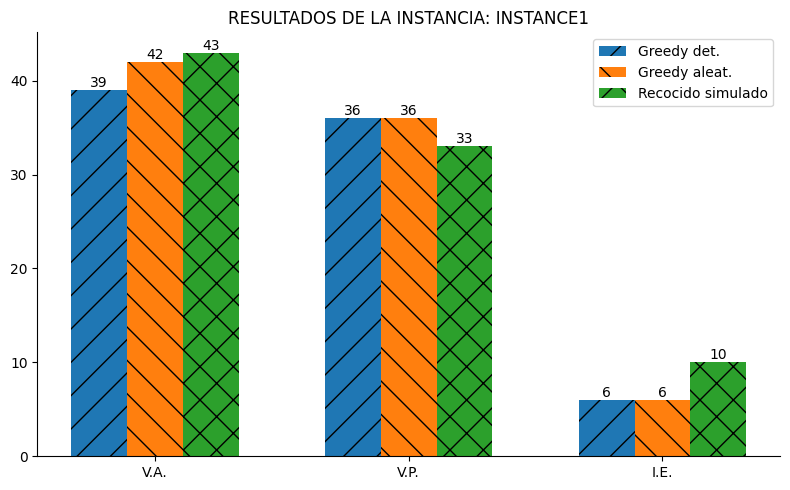

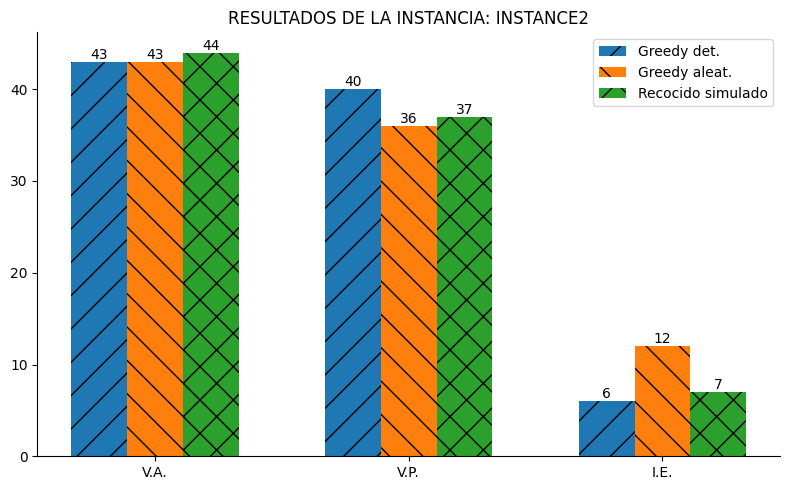

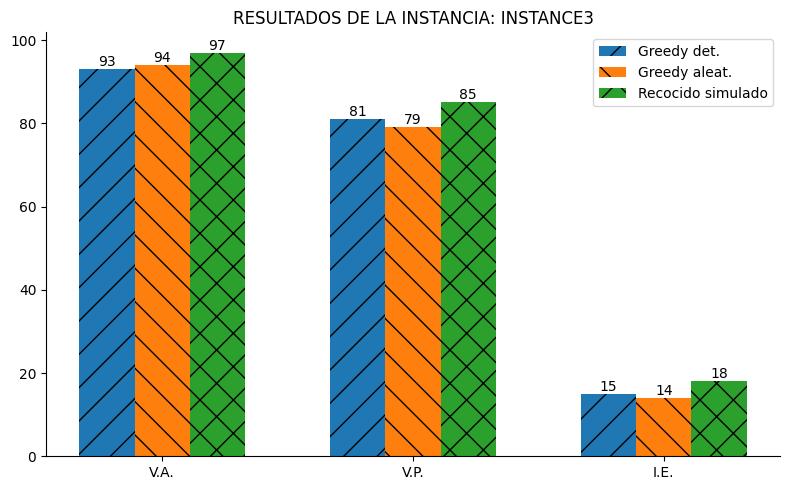

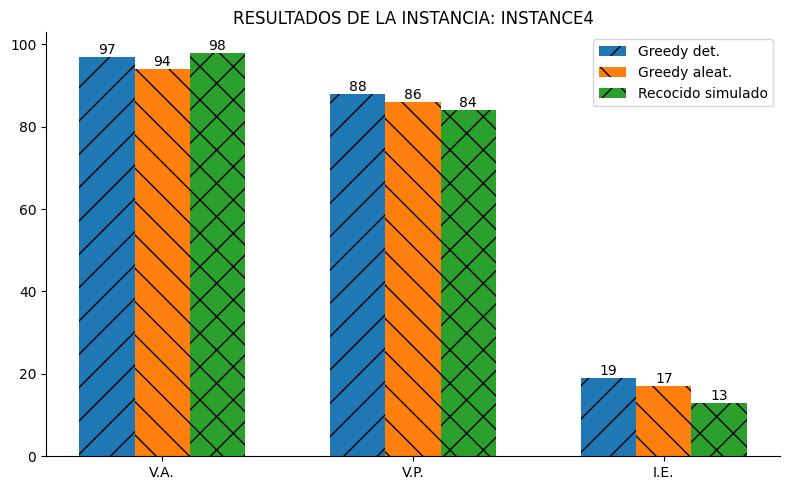

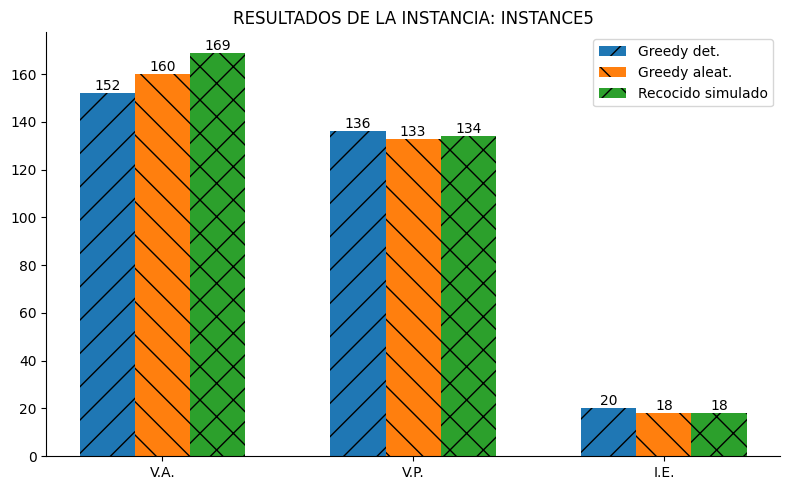

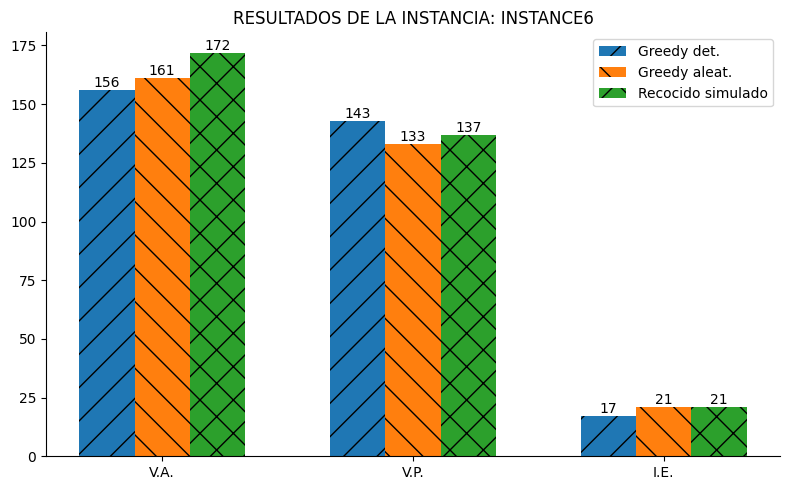

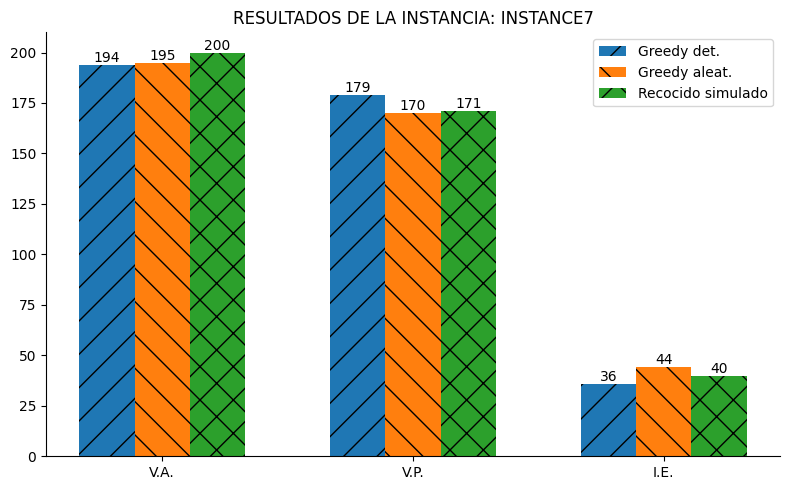

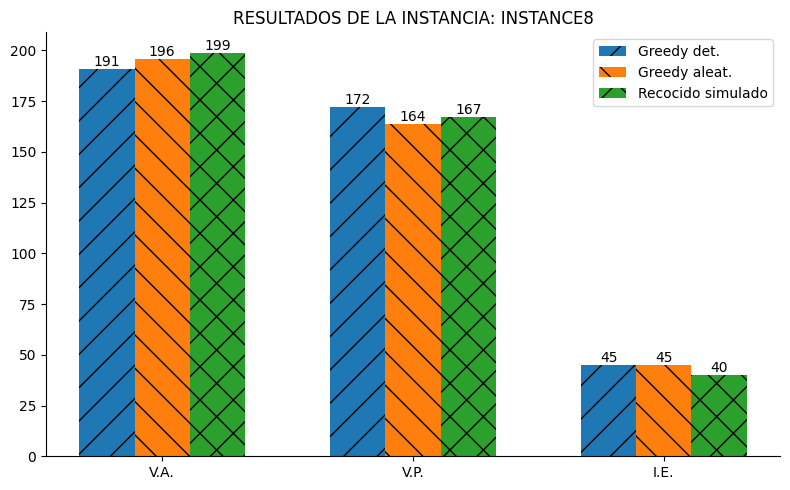

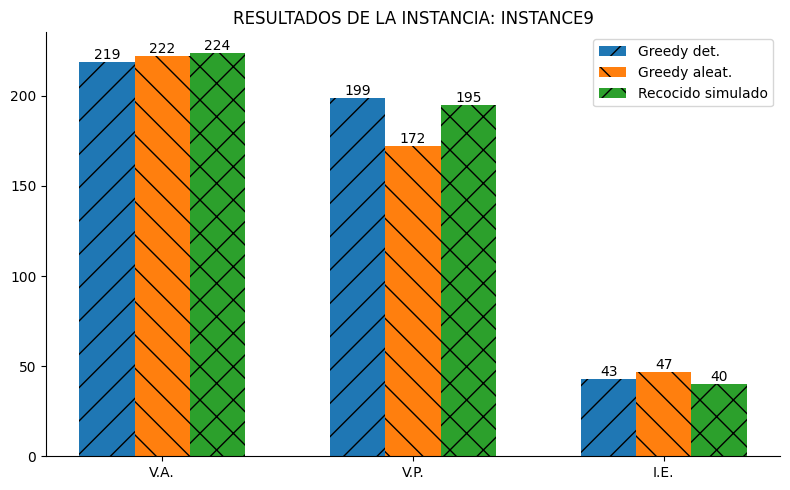

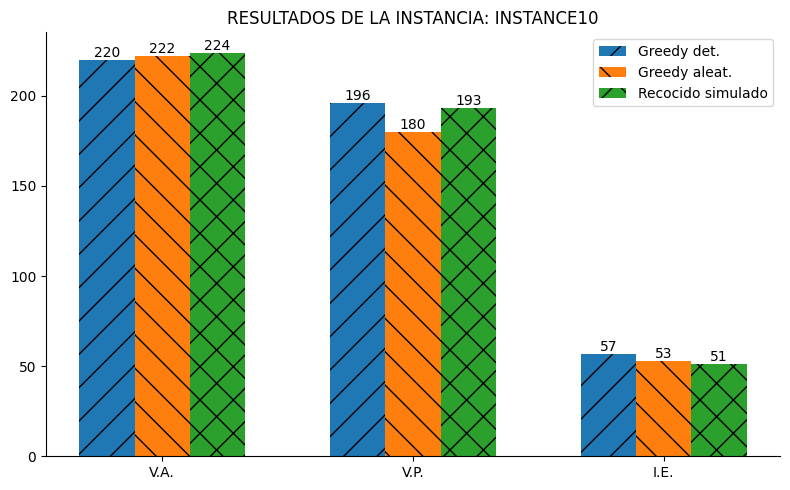

In [79]:
result = plot_instance_bars(summarys, out_dir="results_charts", show=True, save=True, dpi=220)
files_ordenados = sorted(result["files"], key=lambda s: int(re.search(r'(\d+)', s).group(1)))
files_ordenados